# Testing A8 model for different number of considered attributes

A2, A3, etc. 

In [1]:
import pickle
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

import matplotlib.pyplot as plt

from datetime import datetime

import statsmodels.api as sm
import pylab as py

import itertools

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [2]:
file = open('NetSense_network.pkl', 'rb')
# dump information to that file
data = pickle.load(file)

# close the file
file.close()

print('Showing the pickled data:')

cnt = 0
for item in data:
    print('The data ', cnt, ' is : ', item)
    cnt += 1

FileNotFoundError: [Errno 2] No such file or directory: 'NetSense_network.pkl'

In [4]:
#creating list of attributes
list_of_attributes = set([k for n in data[1].nodes for k in data[1].nodes[n].keys()])

#creating possible attribute values
attribute_values = dict((attribute, set() ) for attribute in list_of_attributes)

for sem in range(1,7):
    for node in data[sem].nodes():
        for attribute in list_of_attributes:
            attribute_values[attribute].add(data[sem].nodes[node][attribute])

attribute_values

#To apply PCA or other analysis on all attributes (i.e. including ethnicity) 
#one would have to create an attribute for each race, that is is_1, is_2 etc. 
#Because this attribute is not ordered. 

{'hometown_1': {1, 2, 3},
 'homosexual_': {1, 2, 3},
 'premaritalsex_': {1, 2, 3},
 'ethnicity_1': {1, 2, 3, 4},
 'political_': {1, 2, 3},
 'euthanasia_': {1, 2, 3},
 'age_1': {1, 2},
 'gender_1': {1, 2},
 'deathpen_': {1, 2, 3},
 'gaymarriage_': {1, 2, 3},
 'abortion_': {1, 2, 3},
 'marijuana_': {1, 2, 3}}

In [5]:
#creating table of attribute values
attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    attributes[i] = np.zeros([len(data[i].nodes), len(list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(list_of_attributes):
            attributes[sem][i,j] = data[sem].nodes[node][attribute]

In [6]:
attributes

{1: array([[1., 3., 3., ..., 3., 3., 2.],
        [1., 2., 2., ..., 1., 2., 3.],
        [1., 1., 3., ..., 3., 3., 3.],
        ...,
        [1., 1., 3., ..., 1., 1., 1.],
        [3., 1., 1., ..., 2., 1., 1.],
        [1., 3., 3., ..., 3., 3., 3.]]),
 2: array([[3., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 3., 3., ..., 3., 1., 1.],
        ...,
        [1., 3., 3., ..., 3., 1., 1.],
        [2., 3., 3., ..., 3., 1., 1.],
        [1., 3., 2., ..., 3., 2., 1.]]),
 3: array([[2., 3., 3., 1., 2., 3., 1., 2., 1., 3., 3., 1.],
        [1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.],
        [2., 1., 1., 1., 2., 1., 2., 2., 1., 2., 1., 3.],
        [1., 3., 3., 3., 3., 3., 1., 2., 3., 3., 1., 3.],
        [1., 3., 3., 1., 1., 3., 2., 1., 1., 3., 3., 2.],
        [1., 1., 1., 2., 2., 3., 1., 2., 1., 3., 3., 1.],
        [2., 3., 3., 1., 1., 2., 1., 1., 1., 3., 1., 2.],
        [2., 3., 3., 1., 3., 2., 2., 2., 1., 3., 3., 1.],
        [1., 3., 1., 1., 1., 

In [7]:
df = pd.DataFrame(data=attributes[1], columns=attribute_values)
print(df)

    hometown_1  homosexual_  premaritalsex_  ethnicity_1  political_  \
0          1.0          3.0             3.0          2.0         1.0   
1          1.0          2.0             2.0          2.0         1.0   
2          1.0          1.0             3.0          2.0         3.0   
3          1.0          3.0             3.0          2.0         3.0   
4          1.0          3.0             3.0          2.0         2.0   
..         ...          ...             ...          ...         ...   
93         2.0          1.0             3.0          1.0         1.0   
94         1.0          3.0             3.0          2.0         3.0   
95         1.0          1.0             3.0          4.0         2.0   
96         3.0          1.0             1.0          1.0         1.0   
97         1.0          3.0             3.0          1.0         2.0   

    euthanasia_  age_1  gender_1  deathpen_  gaymarriage_  abortion_  \
0           3.0    1.0       2.0        3.0           3.0      

In [8]:

# ord_list_of_attributes = list_of_attributes - {'ethnicity_1', 'gender_1', 'hometown_1', 'age_1'}
ord_list_of_attributes = {'gaymarriage_', 'premaritalsex_', 'marijuana_', 'deathpen_', 'euthanasia_', 'abortion_', 'homosexual_', 'political_'}
print(ord_list_of_attributes)

#creating table of attribute values
ord_attributes = dict((i, 0) for i in range(1,7))
for i in range(1,7):
    ord_attributes[i] = np.zeros([len(data[i].nodes), len(ord_list_of_attributes)])

for sem in range(1,7):
    for i, node in enumerate(data[sem].nodes()):
        for j, attribute in enumerate(ord_list_of_attributes):
            ord_attributes[sem][i,j] = data[sem].nodes[node][attribute]
print(ord_attributes)

{'homosexual_', 'premaritalsex_', 'political_', 'euthanasia_', 'gaymarriage_', 'deathpen_', 'abortion_', 'marijuana_'}
{1: array([[3., 3., 1., 3., 3., 3., 3., 2.],
       [2., 2., 1., 2., 1., 2., 2., 3.],
       [1., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 1., 3., 1., 3., 2.],
       [3., 3., 2., 1., 2., 2., 3., 1.],
       [1., 1., 2., 3., 1., 1., 1., 1.],
       [2., 1., 1., 1., 2., 2., 1., 1.],
       [1., 1., 2., 2., 2., 2., 2., 3.],
       [3., 3., 2., 3., 3., 1., 3., 2.],
       [3., 3., 3., 1., 3., 1., 1., 3.],
       [1., 1., 2., 3., 1., 1., 1., 2.],
       [1., 1., 1., 1., 2., 1., 1., 1.],
       [3., 3., 1., 2., 3., 1., 1., 3.],
       [2., 1., 1., 1., 1., 1., 1., 3.],
       [3., 3., 3., 3., 3., 3., 1., 3.],
       [2., 2., 1., 3., 1., 1., 1., 2.],
       [1., 3., 1., 2., 1., 2., 1., 2.],
       [1., 1., 1., 3., 1., 3., 1., 3.],
       [3., 2., 3., 3., 3., 2., 3., 3.],
       [1., 3., 1., 3., 3., 1., 1., 3.],
       [3., 3., 1., 3., 3., 3., 3., 3.],
       [3., 3., 

## Max difference of new attributes

In [8]:
def calc_distance(agent1, agent2, scale = 1):
    return np.sum(np.abs(agent1-agent2)) / len(agent1) / scale

def calc_distances(agents, scale = 1):
    N, A = agents.shape
    
    distances = np.zeros([N,N])
    
    for i in range(0,N):
        for j in range(i+1,N):
            distances[i,j] = calc_distance(agents[i], agents[j], scale)
            distances[j,i] = distances[i,j]
    return distances


In [9]:
ord_attributes[1][[53,79,94]], ord_list_of_attributes

(array([[3., 1., 1., 1., 1., 1., 1., 1.],
        [3., 1., 1., 1., 1., 1., 1., 1.],
        [1., 3., 3., 3., 3., 3., 3., 3.]]),
 {'abortion_',
  'deathpen_',
  'euthanasia_',
  'gaymarriage_',
  'homosexual_',
  'marijuana_',
  'political_',
  'premaritalsex_'})

In [10]:
def calc_link_polarity2(agent1, agent2, th, attr_dif):
    return calc_distance(agent1, agent2, attr_dif) <= th

def calc_link_polarities2(agents, th, attr_dif):
    N, A = agents.shape
    
    polarities = (calc_distances(agents, attr_dif) <= th)*2 - 1 - np.eye(N)
    
    return polarities

def balanced_triad_density(polarities):
    N = polarities.shape[0]
    return (np.sum(np.matmul(polarities,polarities) * polarities) / 6 / (N*(N-1)*(N-2)/6) + 1)/2

In [11]:
# polarities = calc_link_polarities2(dcor_attributes[1], 0.5)
pol2 = calc_link_polarities2(ord_attributes[1], 0.5, 2)
balanced_triad_density(pol2)

0.7293682937092363

In [13]:
def balanced_triad_density_network(polarities, triads):
    T = len(triads)
    dens = 0.
    for triad in triads:
        i, j, k = triad
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            dens = dens + 1
    dens = dens / T
    return dens

def get_triads_polarity(polarities, triads):
    Ts = len(triads)
    
    t_pol = np.zeros(Ts) 
    t_pol_type = np.zeros(Ts)
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        pols = [polarities[i,j], polarities[i,k], polarities[k,j]]
        
        t_pol_type[t] = 3-(sum(pols)+3)/2
        
        if polarities[i,j]*polarities[i,k]*polarities[k,j] >= 0:
            t_pol[t] = 1
        else:
            t_pol[t] = -1
    
    return t_pol, t_pol_type

def count_triads_types(polarities, triads):
    t_pol, t_pol_type = get_triads_polarity(polarities, triads)
    
    t2 = np.array(t_pol_type)
    triads_type = [sum(t2 == i) for i in range(0,4)]
    
    return triads_type


In [14]:
def get_triads(net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]

    triads = []

    for i in range(0,N):
        for j in range(i+1,N):
            if A[i,j] > 0:
                for k in range(j+1,N):
                    if A[i,k] > 0 and A[j,k] > 0:
                        triads.append((i,j,k))
    
    return triads

def get_triads_strength(triads, net):
    A = nx.adjacency_matrix(net).todense() 

    N = A.shape[0]
    Ts = len(triads)
    
    s_mul = np.zeros(Ts) #multiplicative strength
    s_add = np.zeros(Ts) #additive strength
    
    for t in range(0,Ts):
        i, j, k = triads[t]
        s_mul[t] = A[i,j] * A[i,k] * A[j,k]
        s_add[t] = A[i,j] + A[i,k] + A[j,k]
    
    return s_mul, s_add

In [15]:
sem = 1
triads = get_triads(data[sem])

polarities = calc_link_polarities2(ord_attributes[sem], 0.1, 2)

balanced_triad_density_network(polarities, triads), balanced_triad_density(polarities)

(0.06666666666666667, 0.06435409215232485)

In [16]:
sem = 4
triads = get_triads(data[sem])

thetas = np.linspace(0,1,101)

bals = np.zeros(len(thetas))
all_bals = np.zeros(len(thetas))
for i, theta in enumerate(thetas):
    polarities = calc_link_polarities2(ord_attributes[sem], theta, 2)
    bals[i] = balanced_triad_density_network(polarities, triads)
    all_bals[i] = balanced_triad_density(polarities)


Text(0, 0.5, 'density of balanced triads')

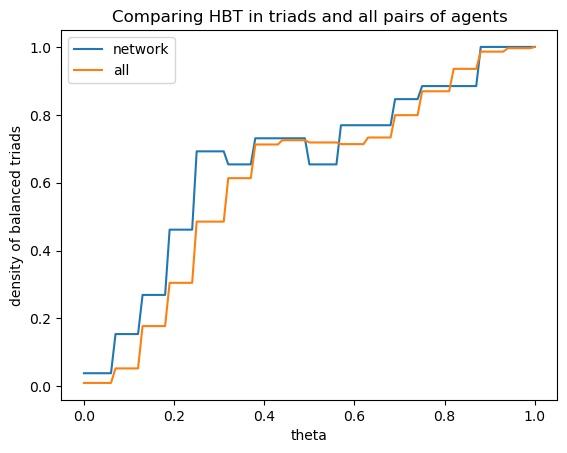

In [18]:
plt.plot(thetas, bals, thetas, all_bals)
plt.legend(["network", "all"])
plt.title("Comparing HBT in triads and all pairs of agents")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

# A8

In [19]:
ord_attributes[1][:,1]

array([3., 2., 3., 3., 3., 1., 1., 1., 3., 3., 1., 1., 3., 1., 3., 2., 3.,
       1., 2., 3., 3., 3., 3., 3., 3., 1., 1., 1., 2., 1., 1., 3., 3., 3.,
       1., 1., 1., 3., 3., 1., 1., 3., 2., 1., 1., 3., 3., 3., 3., 1., 3.,
       3., 3., 1., 3., 3., 1., 1., 3., 3., 3., 1., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 1., 3., 3., 3., 3., 3., 3., 1., 1., 1., 1., 2., 3.,
       1., 3., 3., 3., 3., 1., 1., 3., 3., 3., 3., 1., 3.])

In [20]:
ord_attributes[1][:, [0,5]];

In [21]:
def randomize_attributes(attr):
    N, A = attr.shape
    
    attr_copy = np.copy(attr)
    for i in range(0,A):
        np.random.shuffle(attr_copy[:,i])
    
    return attr_copy

def randomize_all_attributes(attr):
    attrs_copy = {}
    for sem in range(1,len(attr)+1):
        attrs_copy[sem] = randomize_attributes(attr[sem])
    return attrs_copy

def calc_pval_A8(triads, agents, th, attr_dif, M):
    """
    triads - list of sets of node ids forming a triad
    agents - array of vectors of agent attributes
    th - threshold used
    attr_dif - max difference between attributes
    M - number of times to repeat randomization
    """
    polarities = calc_link_polarities2(agents, th, attr_dif)
    bal_dens = balanced_triad_density_network(polarities, triads)
    
#     N = polarities.shape[0]
#     rho = np.sum(polarities == 1)/2 / N/(N-1)*2
    
    bal_dens_rands = np.zeros(M)
    
    for i in range(0,M):
        attr_copy = randomize_attributes(agents)
        polarities_rand = calc_link_polarities2(attr_copy, th, attr_dif)
        bal_dens_rands[i] = balanced_triad_density_network(polarities_rand, triads)
        
    pval = np.sum(bal_dens_rands >= bal_dens)
    
    return bal_dens_rands, bal_dens, pval

def compare_networks2(fun, data, th, attr_dif, M):
    pvals = np.zeros(6)
    vals = np.zeros(6)
    stds = np.zeros(6)
    difs = np.zeros(6)
    
    for n in range(1,7):
#         print(n)
        net = data[n]
        triads = get_triads(net)
        agents = dcor_attributes[n]
        
        bal_dens_rands, bal_dens, pval = fun(triads, agents, th, attr_dif, M)
        pvals[n-1] = pval
        vals[n - 1] = bal_dens
        difs[n-1] = np.mean(bal_dens - bal_dens_rands)
        stds[n-1] = np.std(difs)
    return pvals, vals, difs, stds

In [28]:
np.sum(randomize_all_attributes(ord_attributes)[1][:,1]==1), np.sum(ord_attributes[1][:,1]==1)

(33, 33)

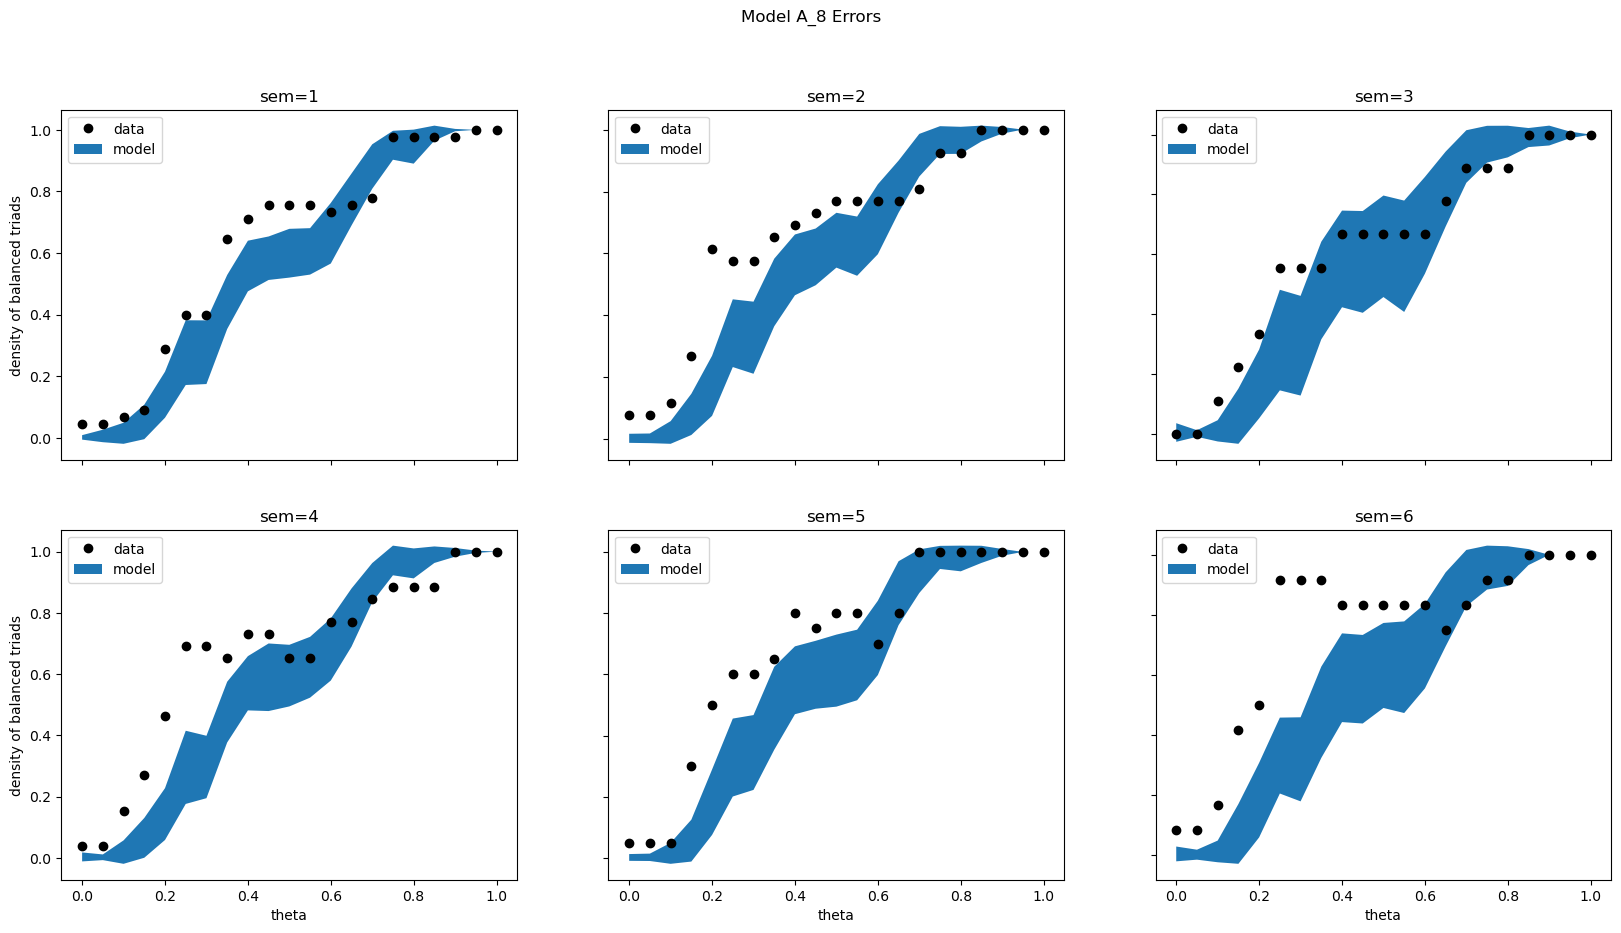

In [56]:
dim1 = 2
dim2 = 3
thetas = np.linspace(0,1,21)
M = 100

pvals = dict((i, np.zeros(len(thetas))) for i in range(1,7))

fig, axs = plt.subplots(dim1, dim2)
fig.set_size_inches(20,10)
fig.suptitle("Model A_8 Errors")

semm = 0
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        semm = semm + 1
        
        prob_bals_mean = np.zeros(len(thetas))
        prob_bals_std = np.zeros(len(thetas))
        bals = np.zeros(len(thetas))
        
        for i, theta in enumerate(thetas):
            triads = get_triads(data[semm])
            bal_dens_rands, bal_dens, pval = calc_pval_A8(triads, ord_attributes[semm], theta, 2, M)
            
            prob_bals_mean[i] = np.mean(bal_dens_rands)
            prob_bals_std[i] = np.std(bal_dens_rands)
            pvals[semm][i] = pval
            
            bals[i] = bal_dens
        
        axs[a1, a2].set_title("sem=" + str(semm))
        # axs[a1,a2].plot(thetas, bals, thetas, prob_bals)
        axs[a1,a2].plot(thetas, bals, 'ko')
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].fill_between(thetas, prob_bals_mean-prob_bals_std, prob_bals_mean+prob_bals_std)
        # plt.plot(thetas, rand_bals_mean)
        axs[a1, a2].legend(["data", "model"])

for ax in axs.flat:
    ax.set(xlabel='theta', ylabel='density of balanced triads')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [54]:
calc_pval_A8(triads, ord_attributes[semm], 0.05, 2, M)

(array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.083, 0.   ,
        0.083, 0.   , 0.   , 0.   , 0.   , 0.083, 0.   , 0.   , 0.   ,
        0.167, 0.   , 0.   , 0.25 , 0.167, 0.   , 0.083, 0.   , 0.083,
        0.   , 0.083, 0.   , 0.   , 0.083, 0.167, 0.   , 0.   , 0.   ,
        0.083, 0.   , 0.   , 0.   , 0.083, 0.083, 0.   , 0.   , 0.083,
        0.   , 0.083, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.083, 0.   , 0.083, 0.   , 0.   , 0.083, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.083, 0.   , 0.   ,
        0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.167,
        0.   , 0.167, 0.   , 0.083, 0.   , 0.   , 0.083, 0.   , 0.   ,
        0.   , 0.   , 0.083, 0.   , 0.   , 0.083, 0.   , 0.   , 0.   ,
        0.   ]),
 0.08333333333333333,
 26)

In [57]:
pvals

{1: array([  1.,   7.,   8.,  22.,   3.,  16.,  15.,   0.,   3.,   1.,   3.,
          4.,  28.,  64.,  91.,  44.,  44.,  88., 100., 100., 100.]),
 2: array([  2.,   3.,   8.,   2.,   0.,   3.,   1.,   4.,  15.,  12.,  14.,
         11.,  37.,  77.,  95.,  90.,  88.,  78.,  95., 100., 100.]),
 3: array([100., 100.,   8.,  13.,  19.,  17.,  11.,  48.,  47.,  39.,  55.,
         46.,  72.,  81.,  86.,  95.,  97.,  91.,  99.,  99., 100.]),
 4: array([  4.,   3.,   3.,   1.,   0.,   1.,   0.,   4.,   3.,  13.,  31.,
         45.,  24.,  65.,  89.,  94.,  94.,  99.,  97.,  99., 100.]),
 5: array([  2.,   3.,  20.,   0.,   1.,   2.,   4.,  17.,   2.,  11.,   8.,
         15.,  64.,  82.,  45.,  77.,  74.,  90.,  98., 100., 100.]),
 6: array([  3.,   1.,   3.,   1.,   0.,   0.,   0.,   0.,  11.,  10.,  14.,
         14.,  26.,  83.,  89.,  85.,  90.,  92., 100., 100., 100.])}

# Similar analysis but with taking all terms together and assuming varying number of considered attributes

In [29]:
ord_attributes[6];

In [78]:
ord_attributes[1][0,2]
theta = 0.5

In [72]:
ord_attributes[1][:, [0,1]] == a;

In [80]:
G = 2
possible_attrs = list(range(0,8))

combs = [comb for comb in itertools.combinations(possible_attrs, G)]
#     print(comb)
combs[0]
a = ord_attributes[1][:, combs[0]]

semm = 1
polarities = calc_link_polarities2(ord_attributes[semm][:, combs[0]], theta, 2)

balanced_triad_density_network(polarities, triads)

0.8846153846153846

### Geting true densities for different groups of attributes considered

In [87]:
# [comb for comb in itertools.combinations((combs, ), G)]

thetas = [i/2/G for i in range(0,2*G)]
all_combinations = list(itertools.product(combs, thetas))
df = pd.DataFrame(all_combinations, columns=['Attributes','Theta'])
df

,Attributes,Theta
0,"(0, 1)",0.00
1,"(0, 1)",0.25
2,"(0, 1)",0.50
3,"(0, 1)",0.75
4,"(0, 2)",0.00
...,...,...
107,"(5, 7)",0.75
108,"(6, 7)",0.00
109,"(6, 7)",0.25
110,"(6, 7)",0.50


In [88]:
df2 = pd.DataFrame()
len(df2)

0

In [111]:
a["T"] = [(5,4,3) for _ in range(len(a.G))]
a

,A,G,T
0,"(0, 1)",2,"(5, 4, 3)"
1,"(0, 2)",2,"(5, 4, 3)"
2,"(0, 3)",2,"(5, 4, 3)"
3,"(0, 4)",2,"(5, 4, 3)"
4,"(0, 5)",2,"(5, 4, 3)"
5,"(0, 6)",2,"(5, 4, 3)"
6,"(0, 7)",2,"(5, 4, 3)"
7,"(1, 2)",2,"(5, 4, 3)"
8,"(1, 3)",2,"(5, 4, 3)"
9,"(1, 4)",2,"(5, 4, 3)"


In [116]:
first_sem = 1
last_sem = 6

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Started analysis")

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

possible_attrs = list(range(0,8))

df = pd.DataFrame()
df_sum = pd.DataFrame

for G in range(1,9):
    thetas = [i/2/G for i in range(0,2*G)]
#     thetas[-1] = 1.
#     bal_dens = np.zeros(len(thetas))
    
    combs = [comb for comb in itertools.combinations(possible_attrs, G)]
    all_combinations = list(itertools.product(combs, thetas))
    df_G = pd.DataFrame(all_combinations, columns=['Attributes','Theta'])
    df_sum_G = pd.DataFrame({"Attributes": combs})
    
    df_G["G"] = G
    df_sum_G["G"] = G
    df_sum_G["Thetas"] = [tuple(thetas) for _ in range(len(df_sum_G.G))]
    
    bal_dens = np.zeros(len(df_G.index))
    
    for ind, row in df_G.iterrows():
        comb = row.Attributes
        theta = row.Theta
                
        for semm in range(first_sem, last_sem+1):
            triads = triads_all[semm-1]

            polarities = calc_link_polarities2(ord_attributes[semm][:, comb], theta, 2)
            bal_dens[ind] = bal_dens[ind] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
    
    df_G["NumBal"] = bal_dens
    df_G["pD"] = bal_dens / triads_all_num
    
    bal_dens2 = np.zeros(len(df_sum_G.index))
    for ind, row in df_sum_G.iterrows():
        comb = row.Attributes
        inds = np.where(df_G.Attributes == comb)
        bal_dens2[ind] = np.sum(df_G.loc[inds].NumBal)
    df_sum_G["SumBal"] = bal_dens2
    
    if len(df) == 0:
        df = df_G
        df_sum = df_sum_G
    else:
        df = pd.concat([df, df_G])
        df_sum = pd.concat([df_sum, df_sum_G])
    
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(current_time, ". Finished G =", G, ".")
df

19:35:04 . Started analysis
19:35:05 . Finished G = 1 .
19:35:16 . Finished G = 2 .
19:35:49 . Finished G = 3 .
19:36:43 . Finished G = 4 .
19:37:39 . Finished G = 5 .
19:38:12 . Finished G = 6 .
19:38:23 . Finished G = 7 .
19:38:25 . Finished G = 8 .


,Attributes,Theta,G,NumBal,pD
0,"(0,)",0.0000,1,121.0,0.876812
1,"(0,)",0.5000,1,121.0,0.876812
2,"(1,)",0.0000,1,129.0,0.934783
3,"(1,)",0.5000,1,129.0,0.934783
4,"(2,)",0.0000,1,120.0,0.869565
...,...,...,...,...,...
11,"(0, 1, 2, 3, 4, 5, 6, 7)",0.6875,8,116.0,0.840580
12,"(0, 1, 2, 3, 4, 5, 6, 7)",0.7500,8,130.0,0.942029
13,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8125,8,134.0,0.971014
14,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8750,8,137.0,0.992754


In [172]:
df_sum

,Attributes,G,Thetas,SumBal
0,"(0,)",1,"(0.0, 0.5)",242.0
1,"(1,)",1,"(0.0, 0.5)",258.0
2,"(2,)",1,"(0.0, 0.5)",240.0
3,"(3,)",1,"(0.0, 0.5)",226.0
4,"(4,)",1,"(0.0, 0.5)",192.0
...,...,...,...,...
4,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1290.0
5,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1262.0
6,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1268.0
7,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1236.0


In [117]:
# #save, commented out not accidentally do it
# with open('aG_true_densities.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump((df, df_sum), file)

In [3]:
#open
with open('aG_true_densities.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    print(myvar)
df, df_sum = myvar

# bal_dens_sum = np.sum(test_triads_A8_bal_dens)
# bal_dens_rands_sum = np.array([np.sum(test_triads_A8_bal_dens_rands[j]) for j in range(0,len(test_triads_A8_bal_dens_rands))])

(                  Attributes   Theta  G  NumBal        pD
0                       (0,)  0.0000  1   121.0  0.876812
1                       (0,)  0.5000  1   121.0  0.876812
2                       (1,)  0.0000  1   129.0  0.934783
3                       (1,)  0.5000  1   129.0  0.934783
4                       (2,)  0.0000  1   120.0  0.869565
..                       ...     ... ..     ...       ...
11  (0, 1, 2, 3, 4, 5, 6, 7)  0.6875  8   116.0  0.840580
12  (0, 1, 2, 3, 4, 5, 6, 7)  0.7500  8   130.0  0.942029
13  (0, 1, 2, 3, 4, 5, 6, 7)  0.8125  8   134.0  0.971014
14  (0, 1, 2, 3, 4, 5, 6, 7)  0.8750  8   137.0  0.992754
15  (0, 1, 2, 3, 4, 5, 6, 7)  0.9375  8   138.0  1.000000

[2048 rows x 5 columns],                   Attributes  G  \
0                       (0,)  1   
1                       (1,)  1   
2                       (2,)  1   
3                       (3,)  1   
4                       (4,)  1   
..                       ... ..   
4      (0, 1, 2, 4, 5, 6, 7)  7 

In [272]:
df_rands = pd.DataFrame()
df_sum_rands = pd.DataFrame()

In [273]:
saved = False

first_sem = 1
last_sem = 6
M = 50
disp_every = 0.2

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Started analysis")

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len[first_sem-1:last_sem])

attr_rands_M = [randomize_all_attributes(ord_attributes) for i in range(0,M)] 

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print(current_time, ". Finished randomization of attributes. ")

possible_attrs = list(range(0,8))

for G in range(1,9):
    thetas = [i/2/G for i in range(0,2*G)]
#     thetas[-1] = 1.
#     bal_dens = np.zeros(len(thetas))
    
    combs = [comb for comb in itertools.combinations(possible_attrs, G)]
    all_combinations = list(itertools.product(combs, thetas))
    df_rands_G = pd.DataFrame(all_combinations, columns=['Attributes','Theta'])
    df_sum_rands_G = pd.DataFrame({"Attributes": combs})
    
    df_rands_G["G"] = G
    df_sum_rands_G["G"] = G
    df_sum_rands_G["Thetas"] = [tuple(thetas) for _ in range(len(df_sum_rands_G.G))]
    
    bal_dens_rands = np.array([np.zeros([M]) for _ in range(len(df_rands_G.index))])
    
    cnt = 0
    disp_every_printer = disp_every
    for ind, row in df_rands_G.iterrows():
        comb = row.Attributes
        theta = row.Theta
        
        for j in range(0,M):  
            for semm in range(first_sem, last_sem+1):
                triads = triads_all[semm-1]  
                
                polarities_rand = calc_link_polarities2(attr_rands_M[j][semm][:, comb], theta, 2)
                bal_dens_rands[ind][j] = bal_dens_rands[ind][j] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

        cnt += 1
        if cnt / len(df_rands_G.index) >= disp_every_printer:
            now = datetime.now()

            current_time = now.strftime("%H:%M:%S")
#             print(disp_every_printer)
            print(current_time, ". Finished ", str(int(cnt / len(df_rands_G.index)*100)), "% of randomized calculations.")
            disp_every_printer += disp_every
#             print(disp_every_printer)
                
        
    df_rands_G["NumBal"] = bal_dens_rands.tolist()
    df_rands_G["pD"] = (bal_dens_rands / triads_all_num).tolist()
    
    bal_dens_rands2 = np.array([np.zeros([M]) for _ in range(len(df_sum_rands_G.index))])
    for ind, row in df_sum_rands_G.iterrows():
        comb = row.Attributes
        inds = np.where(df_rands_G.Attributes == comb)
        bal_dens_rands2[ind] = np.sum([np.array(arr) for arr in df_rands_G.loc[inds].NumBal], axis=0)
#         np.sum(df_rands_G.loc[inds].NumBal)
    df_sum_rands_G["SumBal"] = bal_dens_rands2.tolist()
    
    if len(df_rands) == 0:
        df_rands = df_rands_G
        df_sum_rands = df_sum_rands_G
    else:
        df_rands = pd.concat([df_rands, df_rands_G])
        df_rands.reset_index(inplace = True, drop = True)
        df_sum_rands = pd.concat([df_sum_rands, df_sum_rands_G])
        df_sum_rands.reset_index(inplace = True, drop = True)
    
    now = datetime.now()
    current_time = now.strftime("%H:%M:%S")
    print(current_time, ". Finished G =", G, ".")
df_rands

13:45:55 . Started analysis
13:45:55 . Finished randomization of attributes. 
13:46:14 . Finished  25 % of randomized calculations.
13:46:28 . Finished  43 % of randomized calculations.
13:46:43 . Finished  62 % of randomized calculations.
13:46:58 . Finished  81 % of randomized calculations.
13:47:14 . Finished  100 % of randomized calculations.
13:47:14 . Finished G = 1 .
13:49:10 . Finished  20 % of randomized calculations.
13:50:58 . Finished  40 % of randomized calculations.
13:52:51 . Finished  60 % of randomized calculations.
13:54:39 . Finished  80 % of randomized calculations.
13:56:28 . Finished  100 % of randomized calculations.
13:56:28 . Finished G = 2 .
14:02:03 . Finished  20 % of randomized calculations.
14:07:31 . Finished  40 % of randomized calculations.
14:13:02 . Finished  60 % of randomized calculations.
14:18:29 . Finished  80 % of randomized calculations.
14:24:03 . Finished  100 % of randomized calculations.
14:24:03 . Finished G = 3 .
14:33:17 . Finished  20 %

,Attributes,Theta,G,NumBal,pD
0,"(0,)",0.0000,1,"[114.0, 125.0, 110.0, 121.0, 112.0, 108.0, 111...","[0.8260869565217391, 0.9057971014492754, 0.797..."
1,"(0,)",0.5000,1,"[114.0, 125.0, 110.0, 121.0, 112.0, 108.0, 111...","[0.8260869565217391, 0.9057971014492754, 0.797..."
2,"(1,)",0.0000,1,"[119.0, 131.0, 135.0, 136.0, 119.0, 131.0, 133...","[0.8623188405797102, 0.9492753623188406, 0.978..."
3,"(1,)",0.5000,1,"[119.0, 131.0, 135.0, 136.0, 119.0, 131.0, 133...","[0.8623188405797102, 0.9492753623188406, 0.978..."
4,"(2,)",0.0000,1,"[113.0, 111.0, 108.0, 107.0, 118.0, 109.0, 112...","[0.8188405797101449, 0.8043478260869565, 0.782..."
...,...,...,...,...,...
2043,"(0, 1, 2, 3, 4, 5, 6, 7)",0.6875,8,"[123.0, 131.0, 129.0, 125.0, 133.0, 124.0, 124...","[0.8913043478260869, 0.9492753623188406, 0.934..."
2044,"(0, 1, 2, 3, 4, 5, 6, 7)",0.7500,8,"[131.0, 138.0, 138.0, 134.0, 138.0, 127.0, 133...","[0.9492753623188406, 1.0, 1.0, 0.9710144927536..."
2045,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8125,8,"[137.0, 138.0, 138.0, 138.0, 138.0, 135.0, 138...","[0.9927536231884058, 1.0, 1.0, 1.0, 1.0, 0.978..."
2046,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8750,8,"[138.0, 138.0, 138.0, 138.0, 138.0, 138.0, 138...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


In [249]:
df_sum_rands

,Attributes,G,Thetas,SumBal
0,"(0,)",1,"(0.0, 0.5)","[228.0, 236.0, 240.0, 228.0, 246.0, 246.0, 218..."
1,"(1,)",1,"(0.0, 0.5)","[258.0, 262.0, 264.0, 260.0, 250.0, 252.0, 264..."
2,"(2,)",1,"(0.0, 0.5)","[228.0, 238.0, 224.0, 226.0, 218.0, 228.0, 220..."
3,"(3,)",1,"(0.0, 0.5)","[244.0, 230.0, 242.0, 240.0, 214.0, 214.0, 230..."
4,"(4,)",1,"(0.0, 0.5)","[230.0, 222.0, 202.0, 224.0, 238.0, 206.0, 214..."
...,...,...,...,...
250,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...","[1076.0, 1088.0, 1114.0, 1060.0, 1046.0, 1050...."
251,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...","[1126.0, 1104.0, 1140.0, 1068.0, 1092.0, 1090...."
252,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...","[1116.0, 1118.0, 1132.0, 1086.0, 1104.0, 1098...."
253,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...","[1106.0, 1130.0, 1142.0, 1060.0, 1082.0, 1090...."


In [276]:
# df_sum_rands.reset_index(inplace = True, drop = True)
# df_rands.reset_index(inplace = True, drop = True)
saved

True

In [10]:
#open, add and save
if not saved:
    with open('aG_rand_results.pkl', 'rb') as file:

        # Call load method to deserialze
        old_data = pickle.load(file)

    for ind, row in df_rands.iterrows():
        df_rands.loc[ind].NumBal.extend(old_data[0].loc[ind].NumBal)
        df_rands.loc[ind].pD.extend(old_data[0].loc[ind].pD)
    for ind, row in df_sum_rands.iterrows():
        df_sum_rands.loc[ind].SumBal.extend(old_data[1].loc[ind].SumBal)

    with open('aG_rand_results.pkl', 'wb') as file:

        # A new file will be created
        pickle.dump((df_rands, df_sum_rands), file)
    saved = True

NameError: name 'saved' is not defined

In [258]:
# #save, commented out not accidentally do it
# with open('aG_rand_results.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump((df_rands, df_sum_rands), file)

In [264]:
df_rands.loc[0].NumBal

[114.0, 118.0, 120.0, 114.0, 123.0, 123.0, 109.0, 109.0, 115.0, 117.0]

In [2]:
#open
with open('aG_rand_results.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    print(myvar)
df_rands, df_sum_rands = myvar

# bal_dens_sum = np.sum(test_triads_A8_bal_dens)
# bal_dens_rands_sum = np.array([np.sum(test_triads_A8_bal_dens_rands[j]) for j in range(0,len(test_triads_A8_bal_dens_rands))])

(                    Attributes   Theta  G  \
0                         (0,)  0.0000  1   
1                         (0,)  0.5000  1   
2                         (1,)  0.0000  1   
3                         (1,)  0.5000  1   
4                         (2,)  0.0000  1   
...                        ...     ... ..   
2043  (0, 1, 2, 3, 4, 5, 6, 7)  0.6875  8   
2044  (0, 1, 2, 3, 4, 5, 6, 7)  0.7500  8   
2045  (0, 1, 2, 3, 4, 5, 6, 7)  0.8125  8   
2046  (0, 1, 2, 3, 4, 5, 6, 7)  0.8750  8   
2047  (0, 1, 2, 3, 4, 5, 6, 7)  0.9375  8   

                                                 NumBal  \
0     [114.0, 125.0, 110.0, 121.0, 112.0, 108.0, 111...   
1     [114.0, 125.0, 110.0, 121.0, 112.0, 108.0, 111...   
2     [119.0, 131.0, 135.0, 136.0, 119.0, 131.0, 133...   
3     [119.0, 131.0, 135.0, 136.0, 119.0, 131.0, 133...   
4     [113.0, 111.0, 108.0, 107.0, 118.0, 109.0, 112...   
...                                                 ...   
2043  [123.0, 131.0, 129.0, 125.0, 133.0, 124

In [80]:
inds = df_sum_rands.G==1
df_sum_rands[inds].SumBal

inds2 = df_rands.G==1
df_rands[inds2]

,Attributes,Theta,G,NumBal,pD
0,"(0,)",0.0,1,"[114.0, 125.0, 110.0, 121.0, 112.0, 108.0, 111...","[0.8260869565217391, 0.9057971014492754, 0.797..."
1,"(0,)",0.5,1,"[114.0, 125.0, 110.0, 121.0, 112.0, 108.0, 111...","[0.8260869565217391, 0.9057971014492754, 0.797..."
2,"(1,)",0.0,1,"[119.0, 131.0, 135.0, 136.0, 119.0, 131.0, 133...","[0.8623188405797102, 0.9492753623188406, 0.978..."
3,"(1,)",0.5,1,"[119.0, 131.0, 135.0, 136.0, 119.0, 131.0, 133...","[0.8623188405797102, 0.9492753623188406, 0.978..."
4,"(2,)",0.0,1,"[113.0, 111.0, 108.0, 107.0, 118.0, 109.0, 112...","[0.8188405797101449, 0.8043478260869565, 0.782..."
5,"(2,)",0.5,1,"[113.0, 111.0, 108.0, 107.0, 118.0, 109.0, 112...","[0.8188405797101449, 0.8043478260869565, 0.782..."
6,"(3,)",0.0,1,"[120.0, 125.0, 121.0, 122.0, 127.0, 120.0, 118...","[0.8695652173913043, 0.9057971014492754, 0.876..."
7,"(3,)",0.5,1,"[120.0, 125.0, 121.0, 122.0, 127.0, 120.0, 118...","[0.8695652173913043, 0.9057971014492754, 0.876..."
8,"(4,)",0.0,1,"[106.0, 119.0, 110.0, 117.0, 103.0, 117.0, 106...","[0.7681159420289855, 0.8623188405797102, 0.797..."
9,"(4,)",0.5,1,"[106.0, 119.0, 110.0, 117.0, 103.0, 117.0, 106...","[0.7681159420289855, 0.8623188405797102, 0.797..."


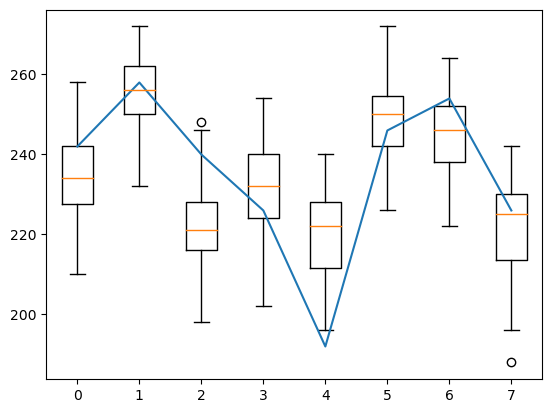

In [88]:
xs =[a[0] for a in df_sum_rands[inds].Attributes]
ys =df_sum_rands[inds].SumBal

fig, ax = plt.subplots()
ax.boxplot(ys);
ax.set_xticklabels(xs)

inds_ = df_sum.G==1
ys2 = df_sum[inds_].SumBal
ax.plot(list(range(1, 9)), ys2)

# b = sns.boxplot(x = xs, y = df_sum_rands[inds].SumBal)

# b.set_xlabel("Number of attributes considered", fontsize = 14)
# b.set_ylabel("p-values of first level test", fontsize = 14)
# b.set_title("", fontsize = 16)

# b.get_figure()

In [193]:
np.mean([arr for arr in df_rands_part.pD[inds2]])

0.4318840579710145

Text(0, 0.5, 'density of balanced triads')

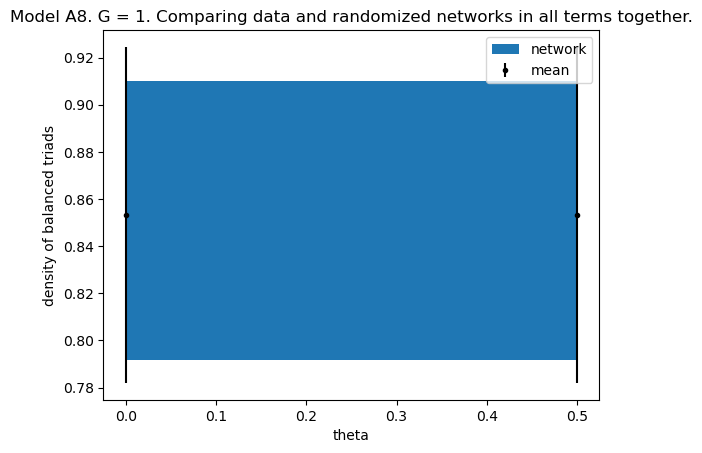

In [70]:
G = 1

inds = df.G == G
df_part = df.loc[inds]
thetas = np.unique(df.Theta[inds])
# print(thetas)

inds_r = df_rands.G == G
df_rands_part = df_rands.loc[inds_r]

pD_means = np.zeros(len(thetas))
pD_stds = np.zeros(len(thetas))

pM_means = np.zeros(len(thetas))
pM_stds = np.zeros(len(thetas))

for it, theta in enumerate(thetas):
    inds2 = df_part.Theta == theta
    pD_means[it] = np.mean(df_part.pD[inds2])
    pD_stds[it] = np.std(df_part.pD[inds2])

    inds2 = df_rands_part.Theta == theta
    pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
    pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])

plt.errorbar(thetas, pD_means, yerr = pD_stds, fmt = 'k.')

plt.fill_between(thetas, pM_means-pM_stds, pM_means+pM_stds)
plt.legend(["network", "mean"])
plt.title("Model A8. G = " + str(G) + ". Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

Text(0, 0.5, 'pD-pM')

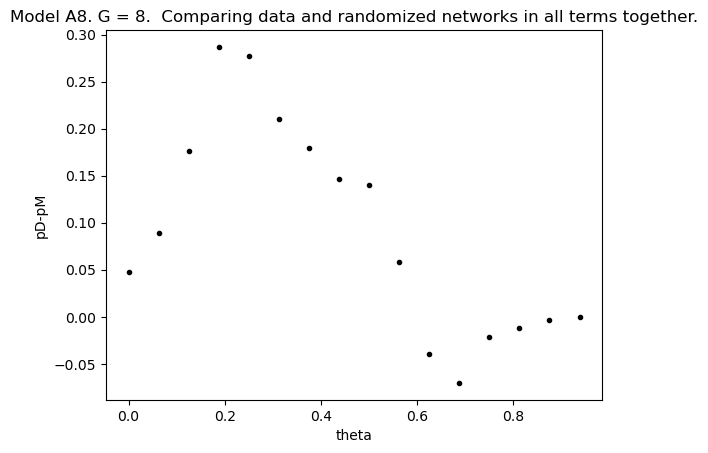

In [265]:

plt.plot(thetas, pD_means - pM_means, 'k.')

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
# plt.legend(["network", "mean"])
plt.title("Model A. G = " + str(G) + ".  Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("pD-pM")

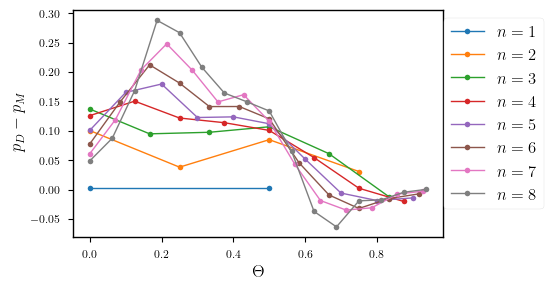

In [28]:
save_ = True

plt.figure(figsize=set_size(width, fraction=1, subplots=(1, 1)))
cmap = plt.get_cmap('tab10')

for G in range(1,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.plot(thetas, pD_means - pM_means, marker = "o", color = cmap.colors[G-1])

plt.legend([r"$n={i}$".format(i=G) for G in list(range(1,9))], fontsize = 12, bbox_to_anchor=(0.98, 1.0), loc='upper left')
# plt.title(r"Model $A_n$", fontsize=14)
plt.xlabel(r"$\Theta$", fontsize=12)
plt.ylabel(r"$p_D-p_M$", fontsize=12)

if save_:
    plt.savefig("modelA-pD-pM.pdf",dpi=600,bbox_inches='tight',format='pdf')

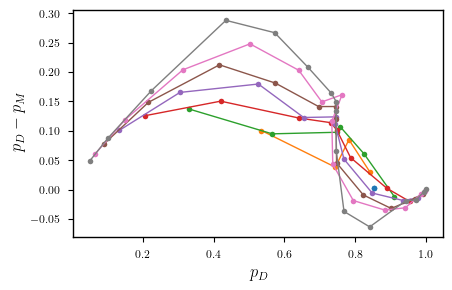

In [21]:
save_ = True

plt.figure(figsize=set_size(width, fraction=1, subplots=(1, 1)))
cmap = plt.get_cmap('tab10')

for G in range(1,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.plot(pD_means, pD_means - pM_means, marker = "o", color = cmap.colors[G-1])

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
# plt.legend([r"$n={i}$".format(i=G) for G in list(range(1,9))], fontsize = 12)
# plt.title(r"Model $A_n$", fontsize=14)
plt.xlabel(r"$p_D$", fontsize=12)
plt.ylabel(r"$p_D-p_M$", fontsize=12)

if save_:
    plt.savefig("modelA-pD-pM-pD.pdf",dpi=600,bbox_inches='tight',format='pdf')

Text(0, 0.5, 'pD-pM')

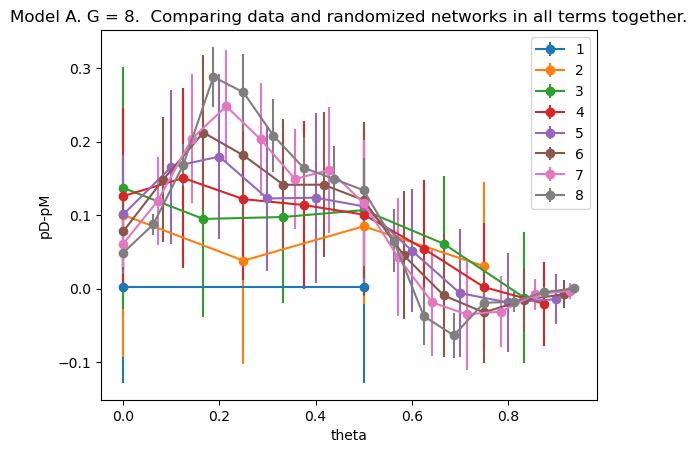

In [283]:
for G in range(1,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.errorbar(thetas, pD_means - pM_means, yerr = pM_stds + pD_stds, marker = "o")

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(list(range(1,9)))
plt.title("Model A. G = " + str(G) + ".  Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("pD-pM")

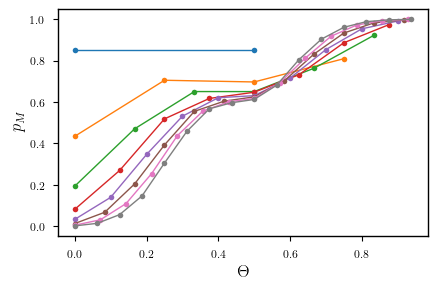

In [31]:
cmap = plt.get_cmap('tab10')
plt.figure(figsize=set_size(width, fraction=1, subplots=(1, 1)))

save_ = True
for G in range(1,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.plot(thetas, pM_means, marker = "o", color = cmap.colors[G-1])

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
# plt.legend([r"$n={i}$".format(i=G) for G in list(range(1,9))], fontsize = 12, bbox_to_anchor=(0.98, 1.0), loc='upper left')
# plt.title(r"Model $A_n$", fontsize=14)
plt.xlabel(r"$\Theta$", fontsize=12)
plt.ylabel(r"$p_M$", fontsize=12)
ylim = plt.ylim()

if save_: 
    plt.savefig("modelA-pM.pdf",dpi=600,bbox_inches='tight',format='pdf')

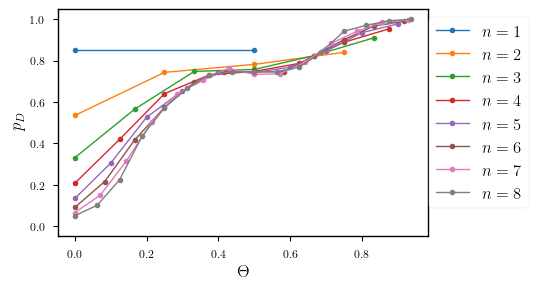

In [32]:
cmap = plt.get_cmap('tab10')
plt.figure(figsize=set_size(width, fraction=1, subplots=(1, 1)))

save_ = True
for G in range(1,9):

    inds = df.G == G
    df_part = df.loc[inds]
    thetas = np.unique(df.Theta[inds])
    # print(thetas)

    inds_r = df_rands.G == G
    df_rands_part = df_rands.loc[inds_r]

    pD_means = np.zeros(len(thetas))
    pD_stds = np.zeros(len(thetas))

    pM_means = np.zeros(len(thetas))
    pM_stds = np.zeros(len(thetas))

    for it, theta in enumerate(thetas):
        inds2 = df_part.Theta == theta
        pD_means[it] = np.mean(df_part.pD[inds2])
        pD_stds[it] = np.std(df_part.pD[inds2])

        inds2 = df_rands_part.Theta == theta
        pM_means[it] = np.mean([arr for arr in df_rands_part.pD[inds2]])
        pM_stds[it] = np.std([arr for arr in df_rands_part.pD[inds2]])
    
    plt.plot(thetas, pD_means, marker = "o", color = cmap.colors[G-1])

# plt.fill_between(test_triads_A8_thetas, mean_vals-std_vals, mean_vals+std_vals)
plt.legend([r"$n={i}$".format(i=G) for G in list(range(1,9))], fontsize = 12, bbox_to_anchor=(0.98, 1.0), loc='upper left')
# plt.title(r"Model $A_n$", fontsize=14)
plt.xlabel(r"$\Theta$", fontsize=12)
plt.ylabel(r"$p_D$", fontsize=12)
# plt.set_cmap(cmap)
plt.ylim(ylim)

# fig.set_size_inches(6, 5)
# plt.rcParams.update({'font.size': 20})

if save_:
    plt.savefig("modelA-pD.pdf",dpi=600,bbox_inches='tight',format='pdf')

/tmp/ipykernel_18233/683637206.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


Text(0, 0.5, '$\\sin (\\theta)$')

<Figure size 640x440 with 0 Axes>

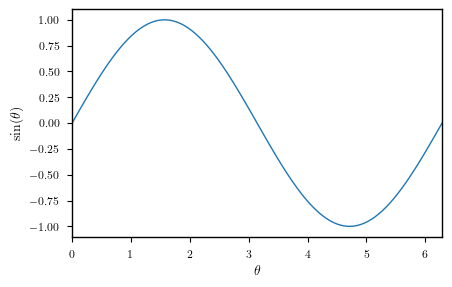

In [15]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

import numpy as np
import matplotlib.pyplot as plt

# Using seaborn's style
plt.style.use('seaborn-paper')
sns.color_palette("tab10", 8)

width = 345
# width = 1000

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams.update(tex_fonts)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 4
# plt.rcParams['image.cmap'] = 'tab10'
cmap = plt.get_cmap('tab10')
plt.set_cmap(cmap)


x = np.linspace(0, 2*np.pi, 100)
# Initialise figure instance
fig, ax = plt.subplots(1, 1, figsize=set_size(width))
# Plot
ax.plot(x, np.sin(x))
ax.set_xlim(0, 2 * np.pi)
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$\sin (\theta)$')



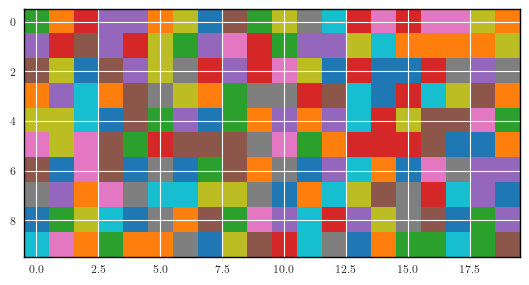

In [26]:
import numpy as np

data = np.random.rand(10, 20)
plt.imshow(data)
plt.show()


In [32]:
cmap.colors[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

In [23]:
import matplotlib as mpl
plt.rcParams['axes.prop_cycle']

'#4C72B0'
'#55A868'
'#C44E52'
'#8172B2'
'#CCB974'
'#64B5CD'


In [128]:
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

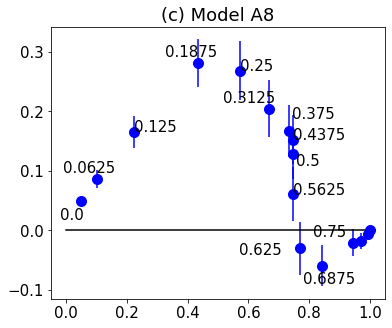

In [21]:
fig, ax = plt.subplots()


chosen_dists = [i/8 for i in range(0,8)]
chosen_dists = [i/16 for i in range(0,16)]

anno_dists = [0, 1/16, 0.125, 3/16, 4/16, 5/16, 6/16, 7/16, 0.5, 9/16, 10/16, 11/16, 12/16]

# ax.plot(pds, pds-pms, color='blue', marker='', linestyle='-', markersize=10)
for i, dist in enumerate(distances):
    if dist not in chosen_dists:
        continue
    dif = pds[i] - pms[i]
#     ax.plot(pds[i], dif, color='blue', marker='o', linestyle='', markersize=10, label=str(dist))
    plt.errorbar(x=pds[i], y=dif,yerr=stds[i],  color='blue', marker='o', markersize=10, label=str(dist))
    if dist == 0.75:
        xy = (pds[i] - 0.13, dif + 0.01)
    elif dist in [7/8]:
        xy = (pds[i]-0.00, dif + 0.0)
    elif dist in [6/16]:
        xy = (pds[i] + 0.01, dif + 0.02)
    elif dist in [8/16]:
        xy = (pds[i] + 0.01, dif - 0.02)
    elif dist in [1/16, 3/16]:
        xy = (pds[i]-0.11, dif + 0.01)
    elif dist in [11/16]:
        xy = (pds[i]-0.06, dif - 0.03)
    elif dist in [5/16]:
        xy = (pds[i]-0.15, dif + 0.01)
    elif dist in [0]:
        xy = (pds[i]-0.07, dif - 0.03)
    elif dist in [0.625]:
        xy = (pds[i]-0.2, dif - 0.01)
#     elif dist == 0:
#         xy = (pds[i]-0.07, dif - 0.03)
    else:
        xy = (pds[i], dif)
    if dist in anno_dists:
        ax.annotate(str(dist),xy=xy)
    #, xytext=(-40,-10), textcoords='offset points')

#plt.rcParams.update({'font.size': 40})
plt.title('(c) Model A8')
fig.set_size_inches(6, 5)
plt.rcParams.update({'font.size': 15})
plt.plot((0,1),(0,0), color='black')

# plt.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)
#plt.xlabel('fraction of balanced '+ coto +' in real data')
#plt.ylabel('fraction of balanced '+ coto +' in real data \nminus fraction of expected balanced '+ coto)

plt.savefig("modelA8v2.pdf",dpi=600,bbox_inches='tight',format='pdf')

with open(f'A8.pkl','wb') as fid:
    pickle.dump(fig, fid)

In [154]:
(pms - pds) / pds

array([-0.956, -0.853, -0.736, -0.644, -0.47 , -0.304, -0.228, -0.203,
       -0.171, -0.081,  0.038,  0.068,  0.021,  0.019,  0.005, -0.   ])

Text(0, 0.5, 'density of balanced triads in all sems')

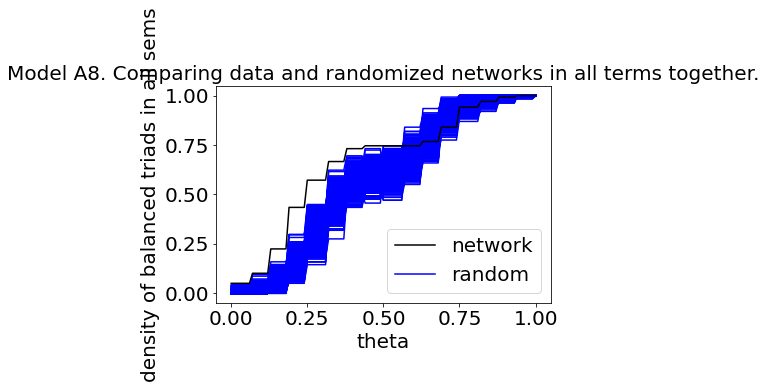

In [149]:
handles_rand = plt.plot(test_triads_A8_thetas, np.array(test_triads_A8_bal_dens_rands).T, 'b')
handles_net, = plt.plot(test_triads_A8_thetas, test_triads_A8_bal_dens, 'k')
# plt.legend(["network", "random"], handles = [handles_net, handles_rand[0]])
plt.legend([handles_net, handles_rand[0]], ["network", "random"])
plt.title("Model A8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads in all sems")

# p-value analysis

In [287]:
df.iloc[0], df_sum.iloc[0]

(Attributes        (0,)
 Theta              0.0
 G                    1
 NumBal           121.0
 pD            0.876812
 Name: 0, dtype: object,
 Attributes          (0,)
 G                      1
 Thetas        (0.0, 0.5)
 SumBal             242.0
 Name: 0, dtype: object)

In [288]:
df_rands.iloc[0], df_sum_rands.iloc[0]

(Attributes                                                 (0,)
 Theta                                                       0.0
 G                                                             1
 NumBal        [114.0, 125.0, 110.0, 121.0, 112.0, 108.0, 111...
 pD            [0.8260869565217391, 0.9057971014492754, 0.797...
 Name: 0, dtype: object,
 Attributes                                                 (0,)
 G                                                             1
 Thetas                                               (0.0, 0.5)
 SumBal        [228.0, 250.0, 220.0, 242.0, 224.0, 216.0, 222...
 Name: 0, dtype: object)

### First level test

Does the whole curve lead to larger densities?

In [16]:
np.sum(df_sum_rands.iloc[0].SumBal >= df_sum.iloc[0].SumBal)

28

In [32]:
pvals_T = np.zeros(len(df_sum.index))
lens = np.array([len(arr) for arr in df_sum_rands.SumBal])

for ind, row in df_sum.iterrows():    
    pvals_T[ind] = np.sum(df_sum_rands.iloc[ind].SumBal >= df_sum.iloc[ind].SumBal)

df_sum["pvals"] = pvals_T / lens
df_sum

,Attributes,G,Thetas,SumBal,pvals
0,"(0,)",1,"(0.0, 0.5)",242.0,0.28
1,"(1,)",1,"(0.0, 0.5)",258.0,0.41
2,"(2,)",1,"(0.0, 0.5)",240.0,0.06
3,"(3,)",1,"(0.0, 0.5)",226.0,0.73
4,"(4,)",1,"(0.0, 0.5)",192.0,1.00
...,...,...,...,...,...
4,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1290.0,0.00
5,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1262.0,0.00
6,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1268.0,0.00
7,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1236.0,0.00


In [18]:
G=4
inds = df_sum.G == G
df_sum.loc[inds]

,Attributes,G,Thetas,SumBal,pvals
92,"(0, 1, 2, 3)",4,"(0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....",772.0,0.00
93,"(0, 1, 2, 4)",4,"(0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....",734.0,0.00
94,"(0, 1, 2, 5)",4,"(0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....",770.0,0.00
95,"(0, 1, 2, 6)",4,"(0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....",850.0,0.00
96,"(0, 1, 2, 7)",4,"(0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....",784.0,0.00
...,...,...,...,...,...
157,"(3, 4, 5, 6)",4,"(0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....",690.0,0.13
158,"(3, 4, 5, 7)",4,"(0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....",690.0,0.17
159,"(3, 4, 6, 7)",4,"(0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....",690.0,0.04
160,"(3, 5, 6, 7)",4,"(0.0, 0.125, 0.25, 0.375, 0.5, 0.625, 0.75, 0....",762.0,0.00


Text(0, 0.5, 'p-values of first level test')

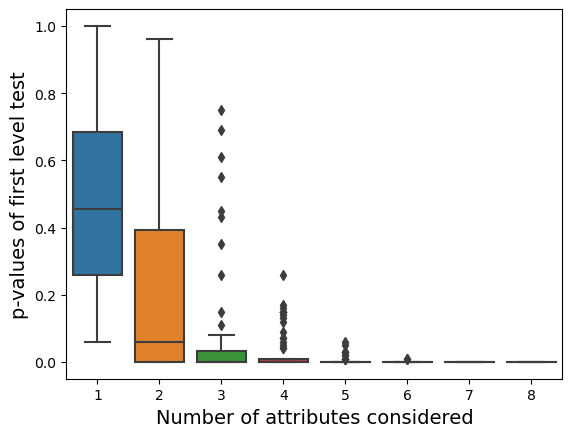

In [329]:
b = sns.boxplot(data = df_sum, x = "G", y = "pvals")

b.set_xlabel("Number of attributes considered", fontsize = 14)
b.set_ylabel("p-values of first level test", fontsize = 14)
# b.set_title("", fontsize = 16)

# b.get_figure()

In [29]:
G=1
inds = df_sum.G == G
comb_cnt = len(df_sum.loc[inds])
prob_reject_1lvl = np.sum(df_sum.loc[inds].pvals < 0.05) / comb_cnt
prob_reject_1lvl

0.0

In [27]:
np.sort(df_sum.loc[inds].pvals)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.03, 0.05,
       0.06])

Text(0, 0.5, 'Ratio of rejected first level tests')

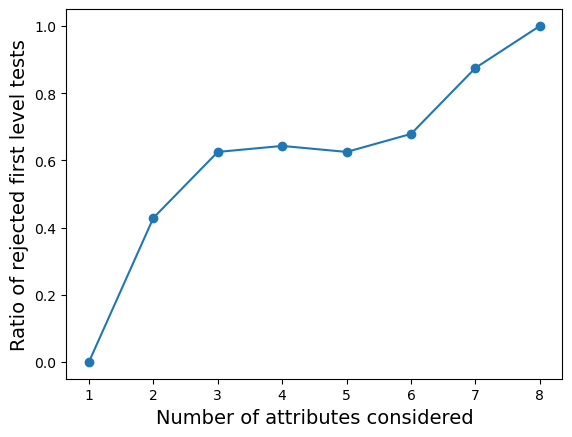

In [72]:
fig, ax = plt.subplots()

prob_reject_1lvl = np.zeros(8)
ns = list(range(1,9))

for n in ns:
    inds = df_sum.G == n
    comb_cnt = len(df_sum.loc[inds])
    prob_reject_1lvl[n-1] = np.sum(df_sum.loc[inds].pvals <= 0.05001) / comb_cnt

ax.plot(ns, prob_reject_1lvl, marker="o")
ax.set_xlabel("Number of attributes considered", fontsize = 14)
ax.set_ylabel("Ratio of rejected first level tests", fontsize = 14)

Text(0, 0.5, 'Ratio of rejected first level tests')

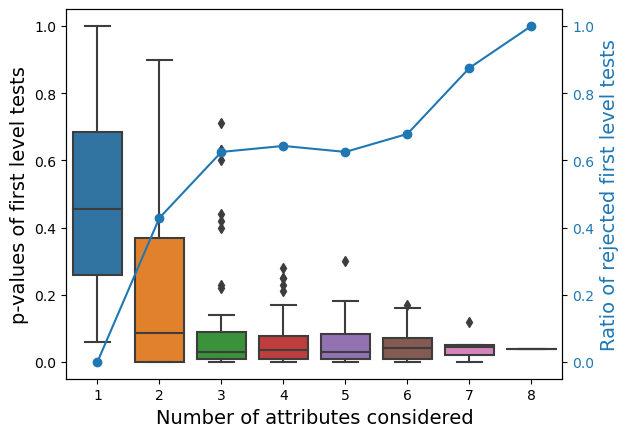

In [68]:
b = sns.boxplot(data = df_sum, x = "G", y = "pvals")

b.set_xlabel("Number of attributes considered", fontsize = 14)
b.set_ylabel("p-values of first level tests", fontsize = 14)
# b.set_title("", fontsize = 16)

ax2 = b.twinx()

ax2.plot(list(range(8)), prob_reject_1lvl, marker="o", color = "tab:blue")
# ax2.set_xlabel("Number of attributes considered", fontsize = 14)
ax2.tick_params(axis='y', labelcolor="tab:blue")
ax2.set_ylabel("Ratio of rejected first level tests", fontsize = 14, color = "tab:blue")

In [4]:
df.reset_index(drop=True, inplace = True)
df_sum.reset_index(drop=True, inplace = True)

### Second level test

What are the exact thetas that have small p-values?

In [14]:
np.sum(df_rands.iloc[-1].NumBal >= df.iloc[-1].NumBal)

96

In [5]:
pvals_T = np.zeros(len(df.index))
lens = np.array([len(arr) for arr in df_rands.NumBal])

for ind, row in df.iterrows():    
    pvals_T[ind] = np.sum(df_rands.iloc[ind].NumBal >= df.iloc[ind].NumBal)

df["pvals"] = pvals_T / lens
df

,Attributes,Theta,G,NumBal,pD,pvals
0,"(0,)",0.0000,1,121.0,0.876812,0.28
1,"(0,)",0.5000,1,121.0,0.876812,0.28
2,"(1,)",0.0000,1,129.0,0.934783,0.41
3,"(1,)",0.5000,1,129.0,0.934783,0.41
4,"(2,)",0.0000,1,120.0,0.869565,0.06
...,...,...,...,...,...,...
2043,"(0, 1, 2, 3, 4, 5, 6, 7)",0.6875,8,116.0,0.840580,0.99
2044,"(0, 1, 2, 3, 4, 5, 6, 7)",0.7500,8,130.0,0.942029,0.86
2045,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8125,8,134.0,0.971014,0.92
2046,"(0, 1, 2, 3, 4, 5, 6, 7)",0.8750,8,137.0,0.992754,0.92


In [321]:
G=8
inds = df_rands.G == G
df_rands.loc[inds]

,Attributes,Theta,G,NumBal,pD
2032,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0000,8,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.007246376811594203, 0.0, 0.0, 0.0..."
2033,"(0, 1, 2, 3, 4, 5, 6, 7)",0.0625,8,"[2.0, 2.0, 3.0, 1.0, 0.0, 5.0, 1.0, 3.0, 1.0, ...","[0.014492753623188406, 0.014492753623188406, 0..."
2034,"(0, 1, 2, 3, 4, 5, 6, 7)",0.1250,8,"[11.0, 6.0, 11.0, 10.0, 5.0, 9.0, 6.0, 5.0, 6....","[0.07971014492753623, 0.043478260869565216, 0...."
2035,"(0, 1, 2, 3, 4, 5, 6, 7)",0.1875,8,"[22.0, 15.0, 19.0, 31.0, 18.0, 18.0, 15.0, 17....","[0.15942028985507245, 0.10869565217391304, 0.1..."
2036,"(0, 1, 2, 3, 4, 5, 6, 7)",0.2500,8,"[43.0, 37.0, 51.0, 43.0, 37.0, 43.0, 41.0, 44....","[0.3115942028985507, 0.26811594202898553, 0.36..."
2037,"(0, 1, 2, 3, 4, 5, 6, 7)",0.3125,8,"[64.0, 52.0, 73.0, 61.0, 66.0, 69.0, 66.0, 62....","[0.463768115942029, 0.37681159420289856, 0.528..."
2038,"(0, 1, 2, 3, 4, 5, 6, 7)",0.3750,8,"[80.0, 67.0, 84.0, 69.0, 75.0, 81.0, 77.0, 76....","[0.5797101449275363, 0.4855072463768116, 0.608..."
2039,"(0, 1, 2, 3, 4, 5, 6, 7)",0.4375,8,"[87.0, 77.0, 84.0, 80.0, 80.0, 79.0, 80.0, 79....","[0.6304347826086957, 0.5579710144927537, 0.608..."
2040,"(0, 1, 2, 3, 4, 5, 6, 7)",0.5000,8,"[91.0, 77.0, 89.0, 77.0, 88.0, 83.0, 87.0, 88....","[0.6594202898550725, 0.5579710144927537, 0.644..."
2041,"(0, 1, 2, 3, 4, 5, 6, 7)",0.5625,8,"[92.0, 95.0, 101.0, 99.0, 85.0, 100.0, 97.0, 9...","[0.6666666666666666, 0.6884057971014492, 0.731..."


In [48]:
G=2
inds = df.G == G
df.loc[inds]

,Attributes,Theta,G,NumBal,pD,pvals
16,"(0, 1)",0.00,2,95.0,0.688406,0.00
17,"(0, 1)",0.25,2,121.0,0.876812,0.00
18,"(0, 1)",0.50,2,113.0,0.818841,0.01
19,"(0, 1)",0.75,2,117.0,0.847826,0.08
20,"(0, 2)",0.00,2,85.0,0.615942,0.00
...,...,...,...,...,...,...
123,"(5, 7)",0.75,2,120.0,0.869565,0.05
124,"(6, 7)",0.00,2,75.0,0.543478,0.01
125,"(6, 7)",0.25,2,106.0,0.768116,0.02
126,"(6, 7)",0.50,2,106.0,0.768116,0.01


Text(0, 0.5, 'p-values of second level test')

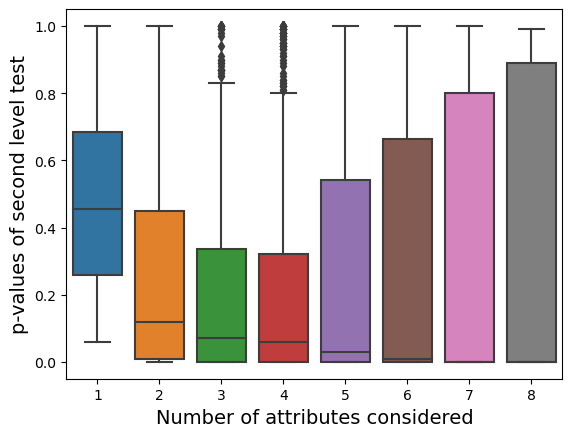

In [6]:
b = sns.boxplot(data = df, x = "G", y = "pvals")

b.set_xlabel("Number of attributes considered", fontsize = 14)
b.set_ylabel("p-values of second level test", fontsize = 14)
# b.set_title("", fontsize = 16)

# b.get_figure()

In [344]:
a = True
not a

False

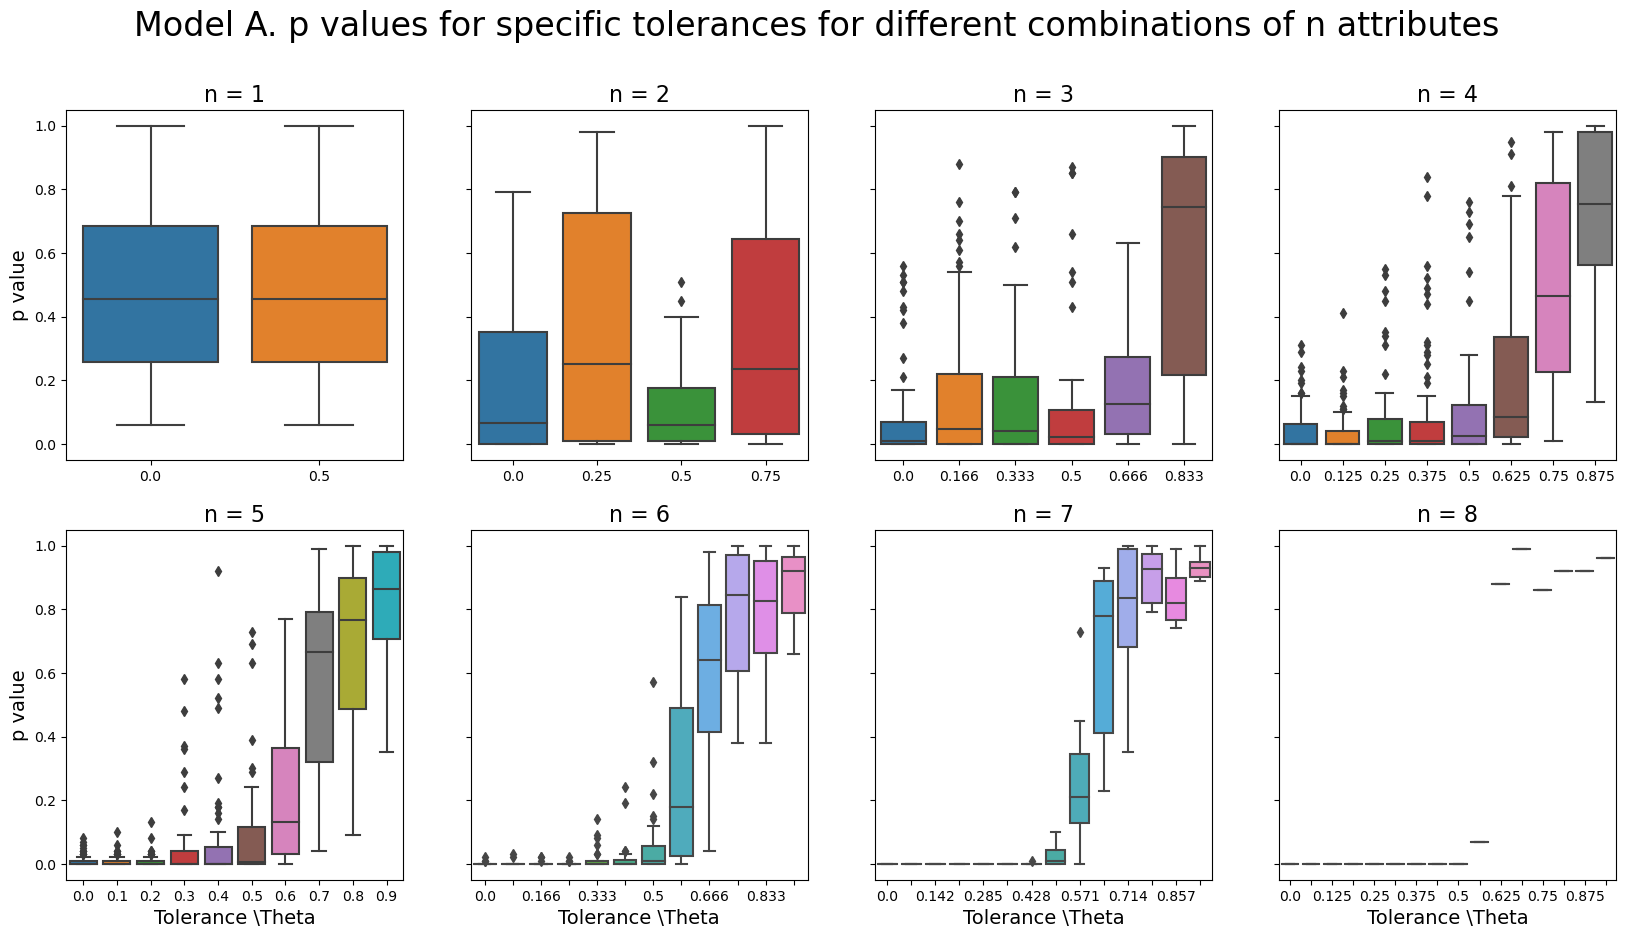

In [7]:
dim1 = 2
dim2 = 4
fig, axs = plt.subplots(dim1, dim2, sharey=True)
fig.set_size_inches(20,10)

fig.suptitle("Model A. p values for specific tolerances for different combinations of n attributes", 
            fontsize = 24)

G=1
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        inds = df.G == G
        b = sns.boxplot(ax = axs[a1, a2], data = df.loc[inds], x = "Theta", y = "pvals")

        xtl = b.get_xticklabels()
        
        """Changing the number of decimals printed"""
        for it in range(len(xtl)):
            xt = xtl[it].get_text()
            xt = xt[:5]
            xtl[it].set_text(xt)
            b.set_xticklabels(xtl)
        
        if len(xtl) > 10:
            even = False
            for it in range(len(xtl)):
                if even:
                    xtl[it].set_text("")
                even = not even
            b.set_xticklabels(xtl)
        
        b.set_title("n = " + str(G), fontsize = 16)
        
        if a2 == 0:
            b.set_ylabel("p value", fontsize = 14)
        else:
            b.set_ylabel("", fontsize = 14)
        
        if a1 == 0:
            b.set_xlabel("", fontsize = 14)
        else:
            b.set_xlabel("Tolerance \Theta", fontsize = 14)
        
        G += 1
#         b.set_xlabel("Theta", fontsize = 14)
#         b.set_ylabel("p-values of second level test", fontsize = 14)

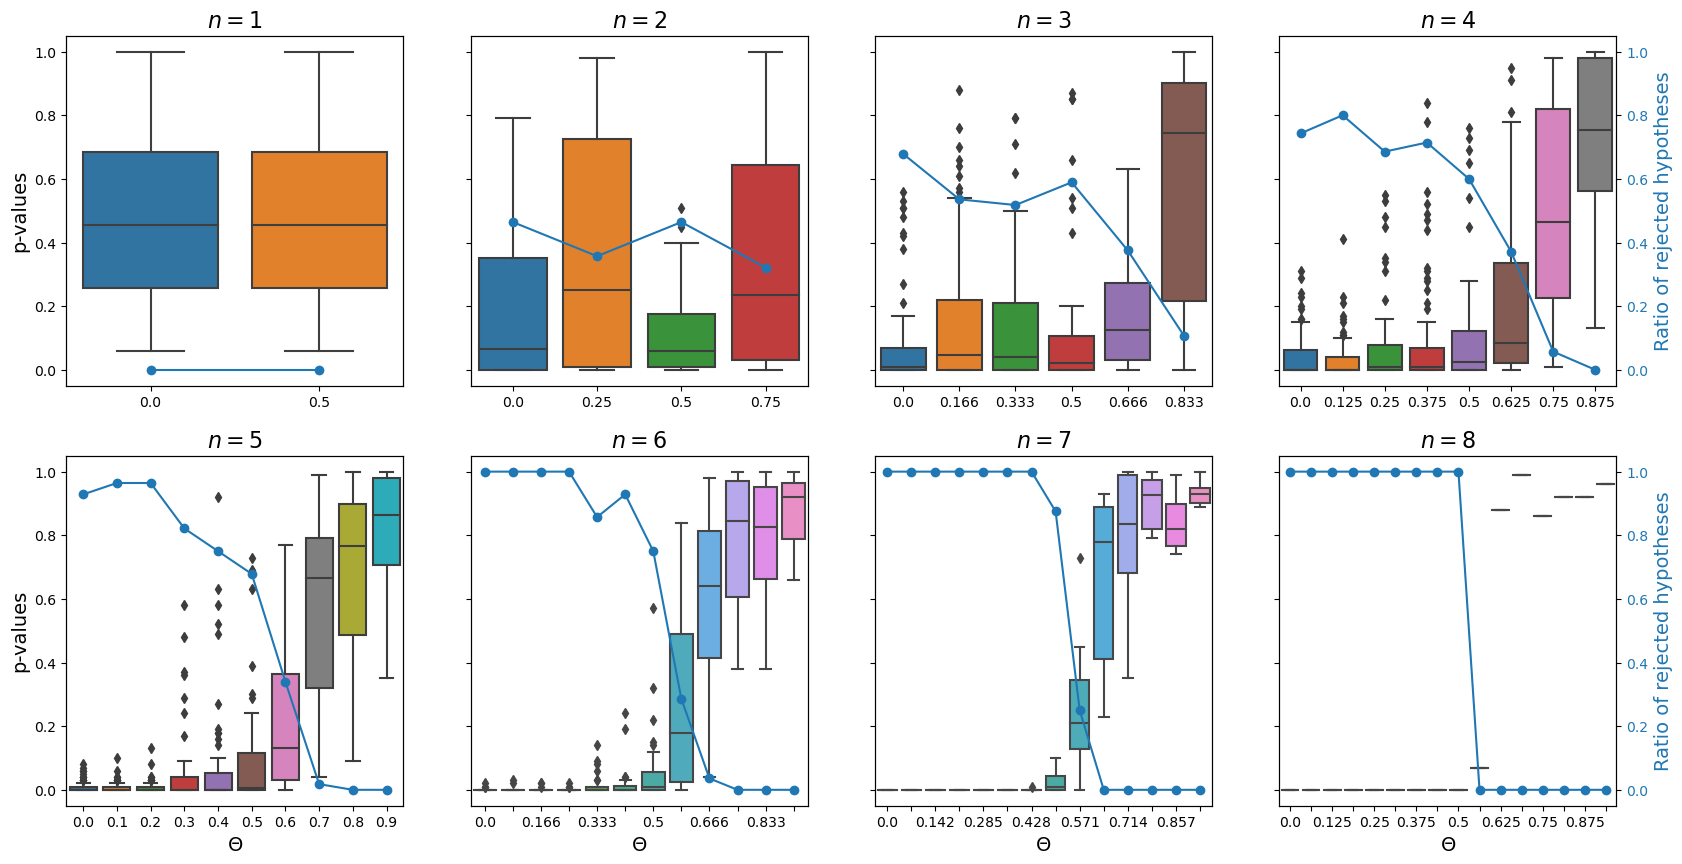

In [12]:
dim1 = 2
dim2 = 4
fig, axs = plt.subplots(dim1, dim2, sharey=True)
fig.set_size_inches(20,10)
secaxes = []  

# fig.suptitle("Model A. p values for specific tolerances for different combinations of n attributes", 
#             fontsize = 24)

G=1
for a1 in range(0,dim1):
    for a2 in range(0,dim2):
        inds = df.G == G
        
        thetas = np.unique(df.loc[inds].Theta)
        
        prob_reject_2lvl = np.zeros(len(thetas))
        
        for it, theta in enumerate(thetas):
            inds2 = df.loc[inds].Theta == theta
            comb_cnt = len(df.loc[inds].loc[inds2].pvals)
            prob_reject_2lvl[it] = np.sum(df.loc[inds].loc[inds2].pvals <= 0.05) / comb_cnt
#         if G == 8:
#             print(len(inds2))
        
        b = sns.boxplot(ax = axs[a1, a2], data = df.loc[inds], x = "Theta", y = "pvals")

        ax2 = b.twinx()
        secaxes.append(ax2)
        if G > 1:
            ax2.sharey(secaxes[0])
        
        ax2.plot(prob_reject_2lvl, marker="o", color = "tab:blue")
        # ax2.set_xlabel("Number of attributes considered", fontsize = 14)
        ax2.tick_params(axis='y', labelcolor="tab:blue")        
        
        xtl = b.get_xticklabels()
        
        """Changing the number of decimals printed"""
        for it in range(len(xtl)):
            xt = xtl[it].get_text()
            xt = xt[:5]
            xtl[it].set_text(xt)
            b.set_xticklabels(xtl)
        
        if len(xtl) > 10:
            even = False
            for it in range(len(xtl)):
                if even:
                    xtl[it].set_text("")
                even = not even
            b.set_xticklabels(xtl)
        
        b.set_title(r"$n = {G}$".format(G=G), fontsize = 16)
        
        if a2 == 0:
            b.set_ylabel("p-values", fontsize = 14)
        else:
            b.set_ylabel("", fontsize = 14)
        
        if a1 == 0:
            b.set_xlabel("", fontsize = 14)
        else:
            b.set_xlabel(r"$\Theta$", fontsize = 14)
        
        if a2 == 3:
            ax2.set_ylabel("Ratio of rejected hypotheses", fontsize = 14, color = "tab:blue")
        else:
#             ax2.get_yaxis().set_ticks([]) 
            ax2.get_yaxis().set_visible(False) 
            ax2.set_ylabel("")
        
        
        G += 1
#         b.set_xlabel("Theta", fontsize = 14)
#         b.set_ylabel("p-values of second level test", fontsize = 14)
# secaxes[0].get_shared_y_axes().join(*secaxes)
# secaxes[0].sharey(secaxes)

plt.savefig("modelA-varying-n-2nd-lvl-test.pdf",dpi=600,bbox_inches='tight',format='pdf')

AttributeError: 'DataFrame' object has no attribute 'Category1'

In [187]:
pvals_T_res1 = np.array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,  37.,  37.,  37.,  37.,  37.,  37., 245., 245., 245.,
       245., 245., 245., 290., 290., 290., 290., 290., 290., 258., 258.,
       258., 258., 258., 258., 258., 277., 277., 277., 277., 277., 277.,
       288., 288., 288., 288., 288., 288., 285., 285., 285., 285., 285.,
       285., 300.])

In [47]:
first_sem = 2
last_sem = 6
thetas = np.linspace(0,1,101)
M = 1000

triads_all = [get_triads(data[semm]) for semm in range(1,last_sem+1)]
triads_len = [len(x) for x in triads_all]
triads_all_num = np.sum(triads_len)

agents_len = [len(ord_attributes[semm]) for semm in range(1,last_sem+1)]

bal_dens = np.zeros(len(thetas))

bal_dens_rands_sum = np.zeros(M)
# attr_rands_M = [randomize_attribute_sets(ord_attributes) for i in range(0,M)] 

rhos = np.zeros([last_sem - first_sem + 1, len(thetas)])

for semm in range(first_sem, last_sem+1):
    triads = triads_all[semm-1]
    
    for i, theta in enumerate(thetas):
        polarities = calc_link_polarities2(ord_attributes[semm], theta, 2)
        bal_dens[i] = bal_dens[i] + balanced_triad_density_network(polarities, triads) * triads_len[semm - 1]
        
        N = polarities.shape[0]
        rhos[semm-first_sem, i] = np.sum(polarities == 1)/2 / N/(N-1)*2

bal_dens_rands = np.zeros([M, len(thetas)])
for j in range(0,M):  
    for semm in range(first_sem, last_sem+1):
        triads = triads_all[semm-1]
        N = agents_len[semm-1]
        for i, theta in enumerate(thetas):    
            polarities_rand = distribute_random_polarities(N, rhos[semm - first_sem, i])
            bal_dens_rands[j][i] = bal_dens_rands[j][i] + balanced_triad_density_network(polarities_rand, triads) * triads_len[semm - 1]

    bal_dens_rands_sum[j] = np.sum(bal_dens_rands[j])
    
bal_dens_sum = np.sum(bal_dens)

bal_dens = bal_dens / triads_all_num
bal_dens_rands = bal_dens_rands / triads_all_num

test_E8_all_agents_terms_together_thetas2 = thetas
test_E8_all_agents_terms_together_bal_dens2 = bal_dens
test_E8_all_agents_terms_together_bal_dens_rands2 = bal_dens_rands

bal_dens_sum, bal_dens_rands_sum

# TODO: do poprawy powyzej. Zrobić, żeby była taka sama randomizacja wszystkich węzłów na raz we wszystkich semestrach. 
#     Obecnie jest to niezależne. 


(6350.0,
 array([5156., 5062., 5083., 5065., 5149., 5086., 5096., 5158., 5148.,
        5119., 5048., 5069., 5129., 5070., 5136., 5052., 5143., 5099.,
        5030., 5204., 5212., 5075., 5113., 5105., 5123., 5082., 5122.,
        5141., 5092., 5101., 5140., 5128., 5106., 5088., 5123., 5210.,
        5036., 5136., 5087., 5158., 5110., 5141., 5177., 5067., 5088.,
        5131., 5144., 5012., 5067., 5130., 5165., 5181., 5106., 5102.,
        5076., 5089., 5165., 5066., 5120., 5116., 5159., 5111., 5145.,
        5136., 5123., 5107., 5124., 5142., 5088., 5176., 5092., 5097.,
        5101., 5078., 5121., 5173., 5089., 5135., 5083., 5151., 5095.,
        5079., 5090., 5070., 5193., 5143., 5182., 5084., 5071., 5106.,
        5148., 5146., 5149., 5137., 5047., 5127., 5175., 5167., 5135.,
        5130., 5168., 5038., 5172., 5134., 5171., 5017., 5142., 5118.,
        5108., 5206., 5189., 5154., 5134., 5161., 5157., 5170., 5048.,
        5085., 5149., 5098., 5152., 5075., 5076., 5122., 5134., 5058

In [48]:
np.sum(bal_dens_sum > bal_dens_rands_sum ), np.sum(bal_dens_sum >= bal_dens_rands_sum)

(1000, 1000)

Text(0, 0.5, 'density of balanced triads')

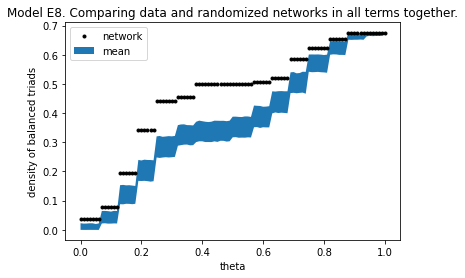

In [50]:
mean_vals = np.mean(np.array(test_E8_all_agents_terms_together_bal_dens_rands2).T,1)
std_vals = np.std(np.array(test_E8_all_agents_terms_together_bal_dens_rands2).T,1)

plt.plot(test_E8_all_agents_terms_together_thetas2, test_E8_all_agents_terms_together_bal_dens2, 'k.')

plt.fill_between(test_E8_all_agents_terms_together_thetas2, mean_vals-std_vals, mean_vals+std_vals)
plt.legend(["network", "mean"])
plt.title("Model E8. Comparing data and randomized networks in all terms together.")
plt.xlabel("theta")
plt.ylabel("density of balanced triads")

In [143]:
pvals_T = np.zeros(len(thetas))

for i, theta in enumerate(thetas):    
    pvals_T[i] = np.sum(bal_dens_rands[:,i] >= bal_dens[i])

pvals_T

array([300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300., 300., 300., 300., 300., 300., 300., 300., 300., 300.,
       300., 300.])

In [142]:
[(theta, pval) for theta, pval in zip(thetas, pvals_T) if pval < 50]

NameError: name 'pvals_T' is not defined

# Sum of ranks analysis

Let's calculate a rank for a given threshold for each series for randomized datasets and let's what is the distribution of these values. Is it normal?

What is the prob. that the sum of ranks for RL dataset is larger than for randomized datasets? 

In [4]:
def calc_rank(vals, val):
    """
    Includes val in vals array sorts it and calculates rank for the val.
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    return all_ranks[-1]

def calc_ranks(vals, val = []):
    """
    Calculated ranks and allows to include one more value. 
    """
    all_vals = np.append(vals, val)
    
    all_ranks = stats.rankdata(all_vals)
    if np.isscalar(val):
        return all_ranks[0:-1], all_ranks[-1]
    else:
        return all_ranks, []

def get_important_theta_values(thetas, bal_dens_rands, bal_dens = [], distances = [i/16 for i in range(0,16)]):
    """
    There are only 16 (17) distinct thetas. So we do not need all the values. 
    """
    pds = np.array([bal_dens[np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))])
    rds = np.array([[bal_dens_rands[j][np.where(thetas >= distances[i])[0][0]] for i in range(0, len(distances))] for j in range(0, len(bal_dens_rands))])
    return pds, rds

def calc_ranks_thetas(bal_dens_rands, bal_dens = []):
    M, num_thetas = bal_dens_rands.shape
#     print(M); 
#     print(num_thetas)
    rl_rank = np.zeros(num_thetas)
    rand_ranks = np.zeros([num_thetas, M])
    
    for theta_ind in range(0, num_thetas):
        vals = [bal_dens_rands[i][theta_ind] for i in range(0, M)]
        if len(bal_dens) > 0:
            val = bal_dens[theta_ind]
        else:
            val = []
        
        rand_ranks[theta_ind], rl_rank[theta_ind] = calc_ranks(vals, val)
    return rand_ranks, rl_rank

In [33]:
inds_G = df_sum.G == G
df_sum[inds_G]

,Attributes,G,Thetas,SumBal,pvals
0,"(0, 1)",2,"(0.0, 0.25, 0.5, 0.75)",446.0,0.00
1,"(0, 2)",2,"(0.0, 0.25, 0.5, 0.75)",436.0,0.00
2,"(0, 3)",2,"(0.0, 0.25, 0.5, 0.75)",376.0,0.60
3,"(0, 4)",2,"(0.0, 0.25, 0.5, 0.75)",354.0,0.56
4,"(0, 5)",2,"(0.0, 0.25, 0.5, 0.75)",404.0,0.05
5,"(0, 6)",2,"(0.0, 0.25, 0.5, 0.75)",480.0,0.00
6,"(0, 7)",2,"(0.0, 0.25, 0.5, 0.75)",416.0,0.00
7,"(1, 2)",2,"(0.0, 0.25, 0.5, 0.75)",412.0,0.02
8,"(1, 3)",2,"(0.0, 0.25, 0.5, 0.75)",374.0,0.81
9,"(1, 4)",2,"(0.0, 0.25, 0.5, 0.75)",374.0,0.34


In [48]:
G = 8
inds_G = df_rands.G == G
df_rands_G = df_rands[inds_G]
combs = np.unique(df_rands_G.Attributes)
comb = combs[0]
inds_c = df_rands_G.Attributes == comb
bal_dens_rands = df_rands_G[inds_c].NumBal.values
bal_dens_rands = np.array([np.array(sin_arr) for sin_arr in bal_dens_rands])
bal_dens_rands.transpose().shape
bal_dens_rands = bal_dens_rands.transpose()

inds_G = df.G == G
df_G = df[inds_G]
inds_c = df_G.Attributes == comb
bal_dens = df_G[inds_c].NumBal.values
bal_dens

rand_ranks, rl_rank = calc_ranks_thetas(bal_dens_rands, bal_dens)

sums = np.sum(rand_ranks,0)
sums
1-np.sum(sums < np.sum(rl_rank))/len(sums)

0.06000000000000005

In [57]:
row = df_sum.iloc[-1]
G = row.G
comb = row.Attributes

inds_G = df_rands.G == G
df_rands_G = df_rands[inds_G]

inds_G = df.G == G
df_G = df[inds_G]

inds_c = df_rands_G.Attributes == comb
bal_dens_rands = df_rands_G[inds_c].NumBal.values
bal_dens_rands = np.array([np.array(sin_arr) for sin_arr in bal_dens_rands])
bal_dens_rands = bal_dens_rands.transpose()

inds_c = df_G.Attributes == comb
bal_dens = df_G[inds_c].NumBal.values

rand_ranks, rl_rank = calc_ranks_thetas(bal_dens_rands, bal_dens)

sums = np.sum(rand_ranks,0)

# pvals_T[ind] = 
1-np.sum(sums < np.sum(rl_rank))/len(sums), G

(0.06000000000000005, 8)

In [65]:
pvals_T = np.zeros(len(df_sum.index))

for ind, row in df_sum.iterrows():   
    G = row.G
    # if G < 8:
    #     continue
    comb = row.Attributes

    inds_G = df_rands.G == G
    df_rands_G = df_rands[inds_G]
    
    inds_G = df.G == G
    df_G = df[inds_G]
    
    # print(df_G)
    
    inds_c = df_rands_G.Attributes == comb
    bal_dens_rands = df_rands_G[inds_c].NumBal.values
    bal_dens_rands = np.array([np.array(sin_arr) for sin_arr in bal_dens_rands])
    bal_dens_rands = bal_dens_rands.transpose()
    
    inds_c = df_G.Attributes == comb
    bal_dens = df_G[inds_c].NumBal.values
    
    rand_ranks, rl_rank = calc_ranks_thetas(bal_dens_rands, bal_dens)
    
    sums = np.sum(rand_ranks,0)
    
    pvals_T[ind] = 1-np.sum(sums < np.sum(rl_rank))/len(sums)
    # print(1-np.sum(sums < np.sum(rl_rank))/len(sums))
    # print(ind)

pvals_T[-1] = 0.038 #from previous more thorough tests
df_sum["pvals"] = pvals_T
df_sum

,Attributes,G,Thetas,SumBal,pvals
0,"(0,)",1,"(0.0, 0.5)",242.0,0.280
1,"(1,)",1,"(0.0, 0.5)",258.0,0.410
2,"(2,)",1,"(0.0, 0.5)",240.0,0.060
3,"(3,)",1,"(0.0, 0.5)",226.0,0.730
4,"(4,)",1,"(0.0, 0.5)",192.0,1.000
...,...,...,...,...,...
250,"(0, 1, 2, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1290.0,0.050
251,"(0, 1, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1262.0,0.050
252,"(0, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1268.0,0.050
253,"(1, 2, 3, 4, 5, 6, 7)",7,"(0.0, 0.07142857142857142, 0.14285714285714285...",1236.0,0.040


In [73]:
# #save, commented out not accidentally do it
# with open('aG_true_densities_1st_pval.pkl', 'wb') as file:
      
#     # A new file will be created
#     pickle.dump((df, df_sum), file)

In [133]:
distances = [i/16 for i in range(0,16)]
pds = np.array([test_triads_A8_bal_dens[np.where(test_triads_A8_thetas >= distances[i])[0][0]] for i in range(0, len(distances))])
rds = np.array([[test_triads_A8_bal_dens_rands[j][np.where(test_triads_A8_thetas >= distances[i])[0][0]] for i in range(0, len(distances))] for j in range(0, len(test_triads_A8_bal_dens_rands))])
    

vals = [rds[i][0] for i in range(0, len(rds))]
val = pds[0]

calc_ranks(vals, val)

(array([ 413. ,  413. ,  413. ,  413. ,  413. ,  413. ,  413. ,  413. ,
         413. ,  413. ,  413. ,  413. ,  413. ,  413. ,  413. ,  413. ,
         413. ,  413. ,  413. ,  953.5,  413. ,  413. ,  413. ,  413. ,
         413. ,  413. ,  413. ,  413. ,  413. ,  413. ,  879.5,  413. ,
         413. ,  413. ,  413. ,  413. ,  413. ,  413. ,  413. ,  413. ,
         413. ,  879.5,  413. ,  413. ,  413. ,  879.5,  413. ,  879.5,
         413. ,  413. ,  413. ,  879.5,  879.5,  413. ,  879.5,  413. ,
         413. ,  413. ,  879.5,  413. ,  413. ,  413. ,  413. ,  413. ,
         413. ,  413. ,  413. ,  413. ,  413. ,  413. ,  997.5,  413. ,
         413. ,  413. ,  413. ,  413. ,  879.5,  953.5,  413. ,  413. ,
         413. ,  413. ,  413. ,  413. ,  413. ,  413. ,  413. ,  413. ,
         879.5,  413. ,  413. ,  413. ,  413. ,  879.5,  413. ,  413. ,
         413. ,  413. ,  953.5,  413. ,  413. ,  413. ,  413. ,  413. ,
         879.5,  413. ,  413. ,  413. ,  413. ,  879.5,  413. , 

In [134]:
rand_ranks, rl_rank = calc_ranks_thetas(rds, pds)

In [135]:
sums = np.sum(rand_ranks,0)

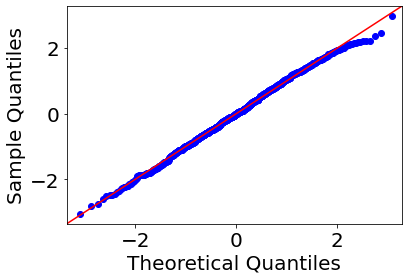

ShapiroResult(statistic=0.9972275495529175, pvalue=0.08320686966180801)

In [141]:
sm.qqplot((sums - np.mean(sums)) / np.std(sums), line ='45')
py.show()
stats.shapiro(sums)

In [137]:
np.sum(sums < np.sum(rl_rank)), sums, np.sum(rl_rank)

(962,
 array([ 6095.5,  6377. ,  7802. ,  8101.5,  8902. ,  6040.5,  6375.5,
         7384. ,  6341.5,  7624.5,  8147.5,  9045. ,  6954. ,  8279.5,
        10607.5, 10006.5,  4253.5, 10146. ,  6966. , 10965. ,  9390.5,
         5978. ,  7073.5,  8748. , 11192. ,  5099. ,  7086. ,  8168.5,
         7604. ,  4205. ,  8441.5,  7475.5, 12062. ,  7282.5,  6941. ,
         7406. ,  9593.5,  7794.5,  4134. ,  9387. ,  7815. ,  7654.5,
         7656. ,  8142.5,  7106.5,  8035. ,  9437. ,  6153. ,  7519.5,
         7179.5,  9657. , 10559. ,  9934. ,  4604.5,  8166. ,  5306.5,
         9335.5,  7060. ,  9322.5,  6829.5,  5356.5,  9638.5,  6797. ,
         6848.5,  9786.5,  9318.5, 11160.5,  9075. ,  5314. ,  6853. ,
         9144.5,  8657.5,  9599. ,  7104.5,  8749.5,  9358.5,  9173.5,
        11299.5,  4622. ,  5743. ,  6839.5,  7068. ,  8966. ,  9760.5,
         7968.5,  8337.5,  5609. ,  6928. ,  8997. ,  6397.5,  5604. ,
         6731.5, 10983.5, 10864.5,  4694. ,  5782. ,  8374.5, 10302.5,


In [138]:
np.max(sums)

13422.5

In [139]:
# pvalue:
1-np.sum(sums < np.sum(rl_rank))/len(sums)

0.038000000000000034